# Name: Ma Cheng Ze Ryan

# Video Link: https://youtu.be/XuspqrEcftk

## Table Of Contents:

#### 1. [Introduction: Problem Understanding](#part1)

#### 2. [Data Exploration](#part2)

   - Step 0: [Importing Libraries](#part2.1)
   
   - Step 1: [Load Data into Jupyter Notebook](#part2.2)
   
#### 3. [Cleanse the Data](#part3)

   - Step 2: [Data Preprocessing](#part3.1)
   
   - Step 3: [Train and Test Split](#part3.2)
   
   - Step 4: [Mising Value Imputation](#part3.3)
   
#### 4. [Data Transformation](#part4)

   - Step 5: [Categorical Data Encoding](#part4.1)
   
   - Step 6: [Numerical Transformation](#part4.2)
   
   - Step 7: [Variable Discretization/Binning](#part4.3)
   
#### 5. [Feature Engineering](#part5)

   - Step 8: [Feature Scaling](#part5.1)
   
   - Step 9: [Adding/Removing Features](#part5.2)

#### 6. [Linear Regression Model](#part6)

   - Step 10: [Linear Regression Modelling](#part6.1)

#### 7. [Summary & Further Improvements](#part7)



### Note: Report is Done Throughout The Notebook

## <u>1. Introduction: Problem Understanding</u> <a id="part1"></a>

**<u>Brief Introduction</u>**

Undoubtedly, the number of businesses developing in the current world is experiencing an everlasting growth. And in all businesses, they perpertaully strive to achieve the most crucial objective of the business: **Obtain Profits**

In order to achieve this primarily ambitious and difficult goal, it is important to study, examine, and analyse the data collected by the businesses.

Putting these concepts into the current case study, various data has been collected from different supermarket outlets and stores in different cities, and our current objective is to predict the sales for each product with respect to the outlet. In order to do so, the data collected is processed and examined, getting a better comprehension of the various characteristics of products and outlets.

These are the following data collected, divided into their respective categories:

<ul>
<li>Outlet - Identifier, Establishment Year, Size, Location Type, Type</li>
<li>Item - Weight, Fat Content, Visibility, Type, MRP</li>
</ul>

**<u>Importance of Analysis</u>**

Detailed understanding and analysis is crucial for the profitability of the supermarket. Without sufficient understand of the properties of products, this could lead the supermarket mistakingly purchase products that is predicted to not perform well in sales, affecting the potential profitability of the supermarket business.

Without sufficient understanding of the outlet sale patterns and properties, products sent to particular locations may lead decrease sales potential according to predicted low sales of certain outlets, losing out the potential of increasing the supermarket's business sales.

Overall, without understanding the properties of products and outlets, this can result in many missed opportunities to reap greater profits for the supermarket business, careless purchasing of products predicted to perform poorly in sales due to certain properties, at the same time, inefficient product placements at outlets that excepts lower sales, overall affecting sales in the supermarket business.

**<u>Gather Positive Outcomes</u>**

By thoroughly investigating the properties of outlets and products, for example, identifying the possible correlation between the Outlet Sales and Maximum Retail Price of products, the supermarket will better understand how the sales of products behave differently according to outlet and product properties. 

Furthermore, by creating a linear regression model for this case study, this can greatly benefit the supermarket by identifying the particular properties of outlets and items that contribute to the **Item Outlet Sales (IOS)**. By identifying the products with properties that have high correlations with **IOS**, the supermarket can purchase products not only based on these focused-on variables, but also outlets that are predicted to have higher amount of sales, allowing the supermarket business to potentially have an increases in sales intake.

Upcoming, we will look into the process of creating the lienar regression model, ultimately attempting to predict the sales of each product.

## <u>2. Data Exploration</u> <a id="part2"></a>

During the early stages upon receiving the **'supermarket.csv'** dataset, exploring the data within the dataset was a crucial process, allowing me to get to know the various dimensions and measures I will be working with throughout the data modelling process.

To start things off, I have decided to primarily conduct bivariate analysis between the target variable (Item_Outlet_Sales) and other variables, intending to find out more about the possible correlations Item_Outlet_Sales potentially has with other variables.

Firstly, I decided to conduct bivariate analysis between Item_Outlet_Sales and other numerical variables.

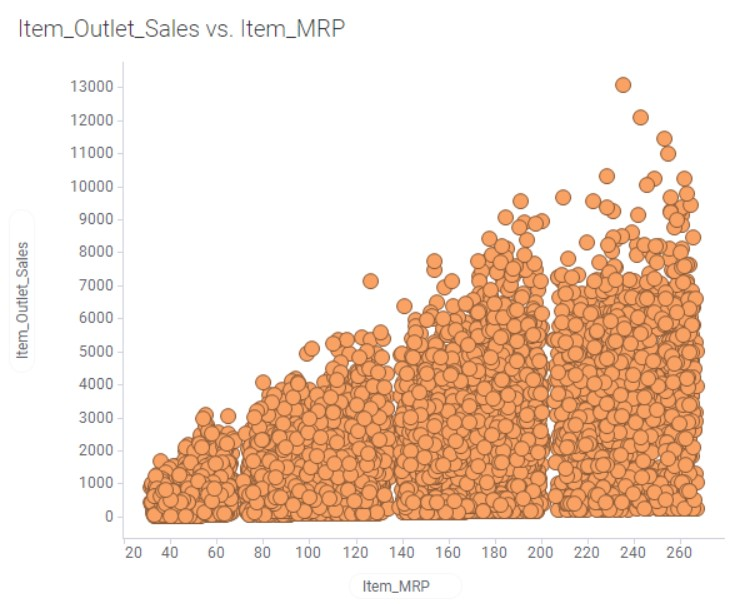

This scatterplot simply represents the relationship between **Item_MRP** and **Item_Outlet_Sales**. Interestingly, from this scatterplot, we can deduce that there is a possible moderate linear relationship between Item_MRP and Item_Outlet_Sales, justified from the **'stairs-like' silhouette** the data presents, showing that there is a possible linearity between Item_Outlet_Sales and Item_MRP, in which higher Item_MRP can moderately justify for a higher Item_Outlet Sales. Hence, Item_MRP would be a variable that can be important for our linear regression modelling later on.

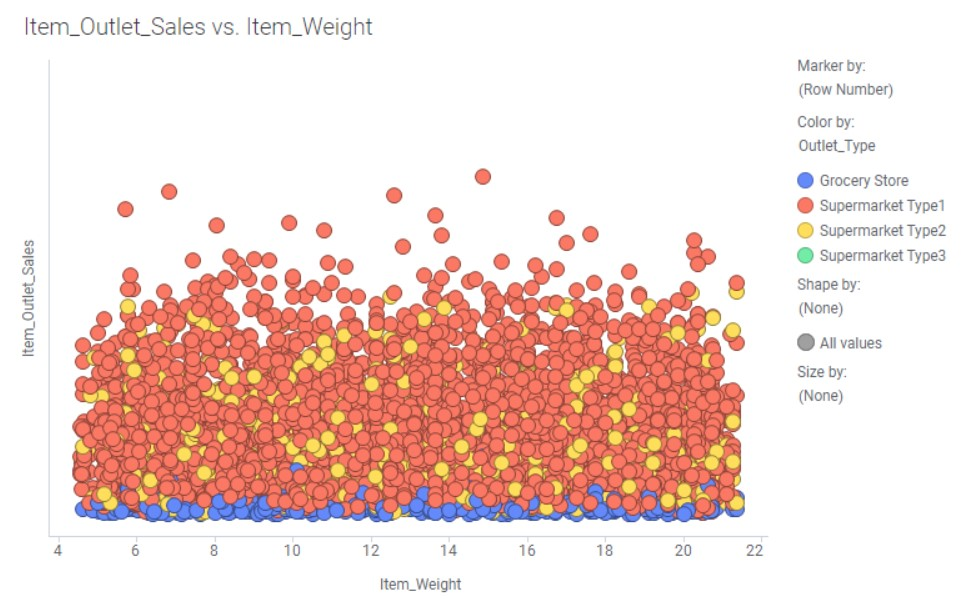

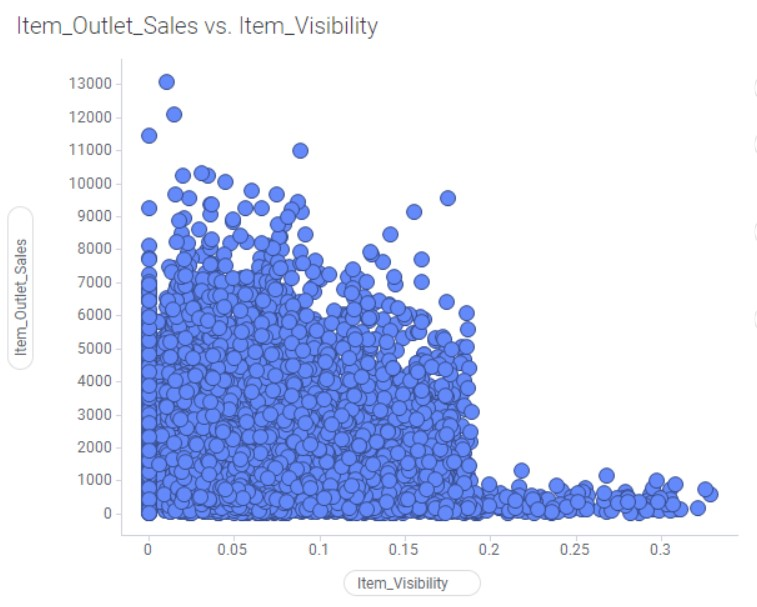

After exploring and visualising numerous visualisations between **Item_Outlet Sales** and **other numerical data**. According to the visualisations above, there is little to decipher between Item_Outlet Sales and the 2 other numerical variables. As the data points is primarily clustered to only one side of the graph, there is little evidence of any form of linearity or inverse correlations that can be deduced.

Nonetheless, for the visualisation between Item_Outlet Sales and Item_Weight, we are mainly able to deduce the distribution of supermarket type, in which there is a high concentration of sales originating from Supermarket Type2. Other than that, not much can be deciphered, hence these variables may not prove to be good features that can achieve a efficient linear model.

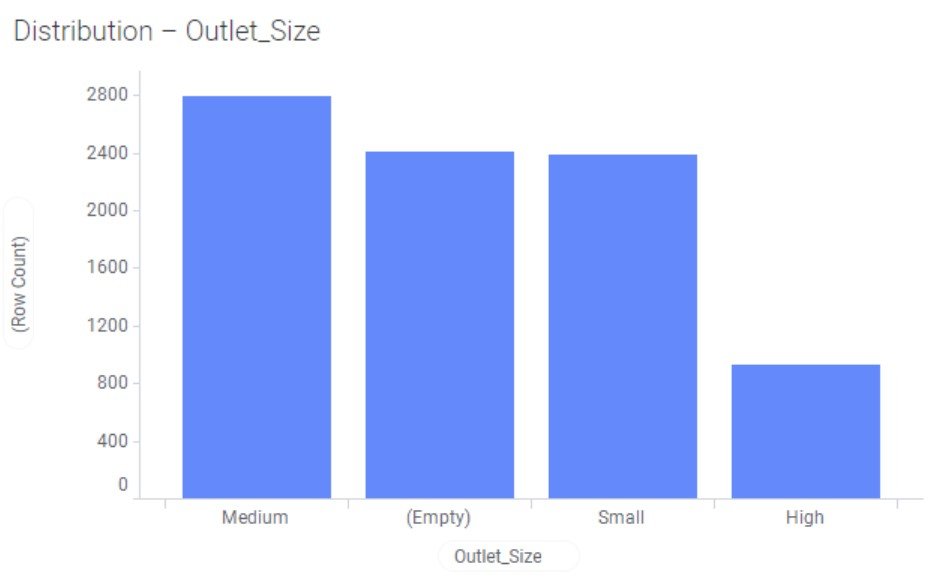

After which, I have decided to proceed with finding out possible relationships with categorical data. From the visual I have plotted, it seems that there is a **substantial quantity of empty values** in outlet size. Hence, this chart alone will aid me in **determining the best method** of imputation for Outlet Size later on.

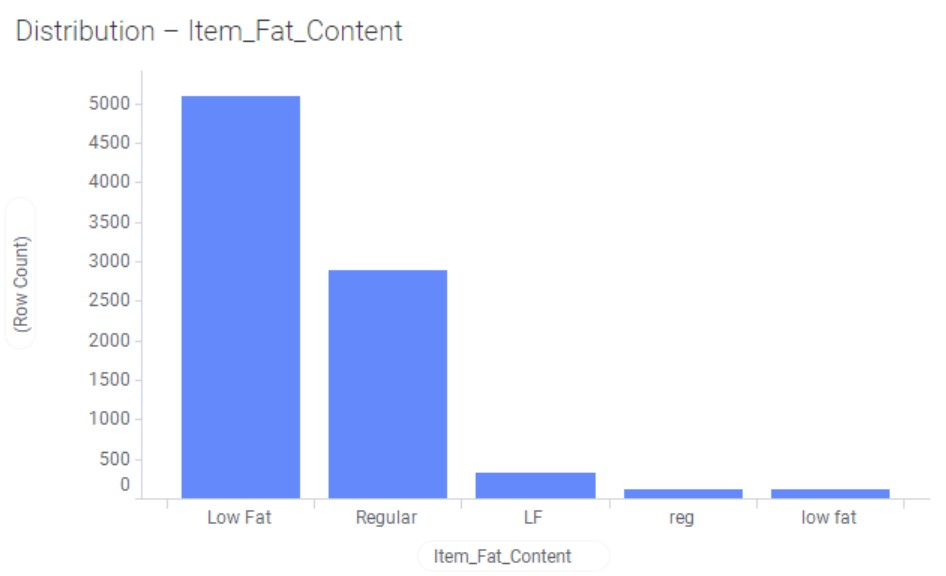

After plotting a chart the represents the **count of Item_Outlet_Sales** for **individual Item_Fat_Content**, what was evident was that there will be cleaning required for it, as the naming conventions of the unique values are incorrect, hence I will be required to take note of this and perform essential data cleaning. Other than this, little relationship can be deciphered between the 2 variables from this chart alone.

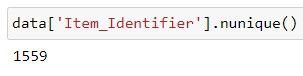

Due to high cardinality of Item_Identifier, to ensure better model performance, I will drop the column, easing the encoding process, allowing the model to perform better in the MSE and R-Square test.


Overall, after exploring various combinations of visuals between Item_Outlet_Sales and the rest of the variables (not shown here), there are only certain variables that could possibly prove to present a moderate linear relationship to the target variable: Item_MRP, Outlet Identifier. Whereas for the rest, it is difficult to ascertain a possible relationship. Therefore, more will be done later to identify such relationships.

### Step 0: Importing Libraries <a id="part2.1"></a>

In [1]:
##### BASIC #####
import pandas as pd
import numpy as np


##### GRAPHICAL #####
import matplotlib.pyplot as plt
import seaborn as sns


##### Q-Q PLOTS #####
import scipy.stats as stats


##### IMPUTATION #####
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import EndTailImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.imputation import AddMissingIndicator


##### ENCODING (CATEGORICAL TO NUMERICAL) #####
from sklearn.preprocessing import OrdinalEncoder

from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import RareLabelEncoder


##### MATHEMATICAL TRANSFORMATION #####
from sklearn.preprocessing import FunctionTransformer

from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer


##### DISCRETISATION (NUMERICAL INTO GROUPS) #####
from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser


##### FEATURE ENGINEERING #####
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.preprocessing import RobustScaler


##### ADDING NEW FEATURES #####
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA


##### TESTS #####
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Step 1: Load Data into Jupyter Notebook <a id="part2.2"></a>

In [2]:
data = pd.read_csv("./supermarket.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Identifying unique values in Item_Fat_Content

data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
data["Item_Fat_Content"].replace("LF","Low Fat",inplace = True)
data["Item_Fat_Content"].replace("low fat","Low Fat",inplace = True)
data["Item_Fat_Content"].replace("reg","Regular",inplace = True)

In [8]:
data['Item_Identifier'].nunique()

1559

In [9]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
data.drop(['Item_Identifier'], axis = 1, inplace = True)

## <u>3. Cleanse the Data</u> <a id="part3"></a>

### Step 2: Data Preprocessing <a id="part3.1"></a>

**<u>Outliers Detection & Handling</u>**

It is important to appropriately handle outliers, otherwise it could unnecessarily skew the linear regression model we intend to create. This can potentially lead to the linear regresesion model to learn unreliable and misleading relationships between the target variable (Item_Outlet_Sales) and the other variables, affecting the overall model performance in accruately predicting the target variable.

For Item_Visibility, I have decided to perform the **winsorisation method**, due to the prevention of the loss of data that could be meaningful in my data analysis later on. From the diagnostic plots done below, it is clear that there is a considerable number of outliers, and since these outliers are not extreme values that affect the data too drastically, at the same time to prevent data loss, I have decided to winsorise it instead of trimming it, preserving data that could bring more meaning for the modelling later on. After doing so, this has slightly reduced the left-skewness of Item_Visibility, as well as eliminating all outliers.

For Item_Outlet_Sales, despite being the target variable, I have decided to handle it by **winsorising the outliers** instead of leaving it as it orignally was. I have done so as to **reduce the model's sensitivity to extreme values** present in the target variable, making more accurate predictions after the model's completion. Furthermore, since all numerical variables have the absence of anomalies, with the presence of anomalies in the target variable, the model **may not be able to predict the outliers in the target variable**, **negatively impacting** the model performance. Hence, I have decided to winsorise it instead to not only address this concern, but also preserving data as well.

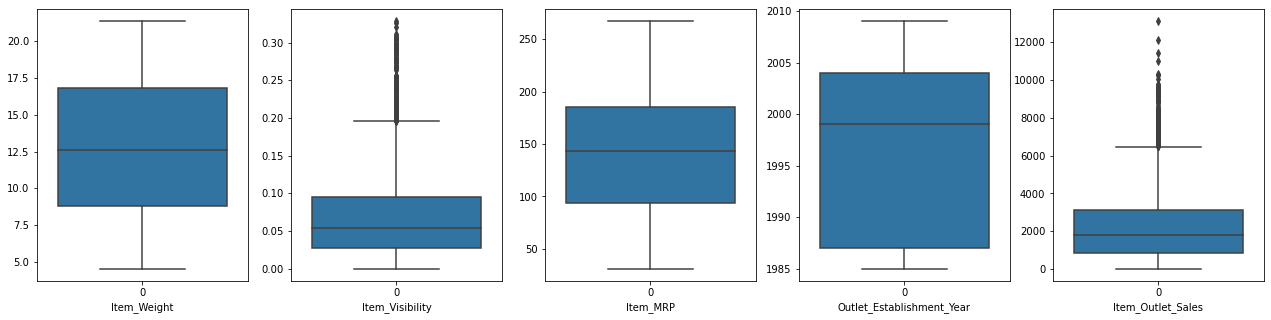

In [11]:
# Detecting for outliers among numerical variables

data_numerical =[c for c in data.columns if data[c].dtype != 'O']
data_numerical = data[data_numerical]

plt.figure(figsize=(22, 5)) 

for i, column in enumerate(data_numerical.columns):
    plt.subplot(1, len(data_numerical.columns), i + 1)
    sns.boxplot(data = data_numerical[column])
    plt.xlabel(column)

In [12]:
# Function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(data, variable):

    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.distplot(data[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

In [13]:
# Function to find the upper and lower boundaries

def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

### _Handling Item_Visibility Outliers_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


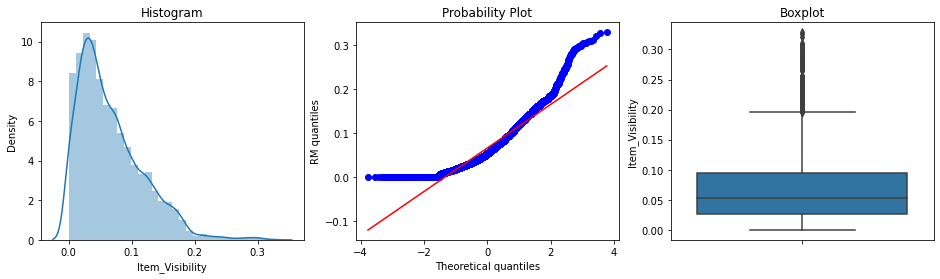

144

In [14]:
diagnostic_plots(data,'Item_Visibility')

upper_boundary1, lower_boundary1 = find_boundaries(data, 'Item_Visibility', 1.5)

outliers_vi = np.where(data['Item_Visibility'] > upper_boundary1, True,
                    np.where(data['Item_Visibility'] < lower_boundary1, True, False))

outliers_vi.sum()

In [15]:
def winsorise(data, variable, upper_limit, lower_limit):
    return np.where(data[variable] > upper_limit, upper_limit, 
                    np.where(data[variable] < lower_limit, lower_limit, data[variable]))

In [16]:
data['Item_Visibility']= winsorise(data, 'Item_Visibility', data['Item_Visibility'].quantile(0.95),
                                   data['Item_Visibility'].quantile(0.05))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


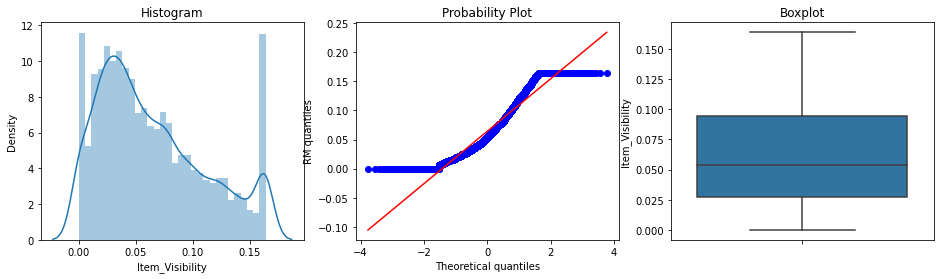

In [17]:
diagnostic_plots(data,'Item_Visibility')

### _Handling Item_Outlet_Sales Outliers_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


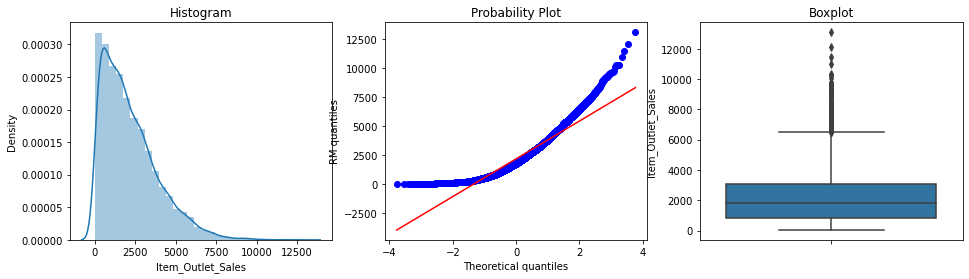

186

In [18]:
diagnostic_plots(data,'Item_Outlet_Sales')

upper_boundary2, lower_boundary2 = find_boundaries(data, 'Item_Outlet_Sales', 1.5)
upper_boundary2, lower_boundary2

outliers_ios = np.where(data['Item_Outlet_Sales'] > upper_boundary2, True,
                    np.where(data['Item_Outlet_Sales'] < lower_boundary2, True, False))

outliers_ios.sum()

In [19]:
data['Item_Outlet_Sales']= winsorise(data, 'Item_Outlet_Sales', data['Item_Outlet_Sales'].quantile(0.95),
                                   data['Item_Outlet_Sales'].quantile(0.05))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


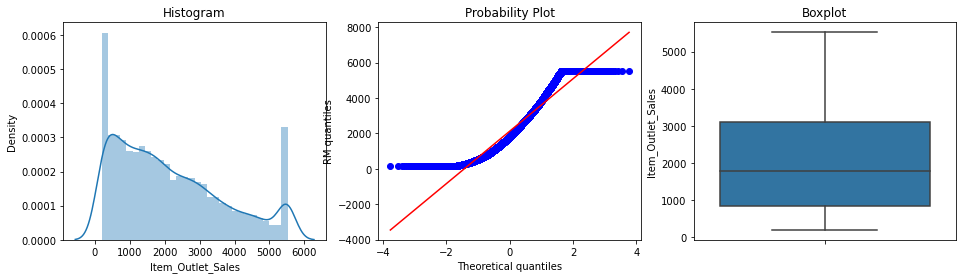

In [20]:
diagnostic_plots(data,'Item_Outlet_Sales')

### Step 3: Train and Test Split <a id="part3.2"></a>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Item_Outlet_Sales', axis=1), data['Item_Outlet_Sales'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((5966, 10), (2557, 10))

### Step 4: Missing Value Imputation <a id="part3.3"></a>

**<u>Missing Data</u>**

I have found out that there were 2 variables with missing data: Outlet_Size, Item_Weight.

For Item_Weight, I have decided to perform random sampling imputation. Comparing to the 2 methods tried, the mean imputation caused the distribution of the data to be **extremely skewed at the mean of the data**, as shown in the diagnostics plot below after imputation. This causes the data to be extremely distorted, drastically affecting the original distribution of the data. Hence, I have decided to use **random sampling** instead as this ensures that the missing values are imputated randomly and not imputated based on 1 value only. And since the **% of missing data is relatively high**, imputation using mean is not suitable due to the distortion caused, and hence, random sampling would be more suitable, **lessening the potential distortion**.

For Outlet_Size, as the **% of missing values is approximately more than 25%**, I have decided to impute 'Missing' for the missing values, as this will **prevent any form of distorting the distribution of the original data**. If imputed with most frequent category, this causes 'Medium' to increase in counts by twice, causing the distribution to change siginificantly, skewing highly to Outlet Size Medium, leading to misleading and biased data. Hence, imputing 'Missing' would be the best fit to prevent distortion of the Outlet_Size data to prevent this phenomenon.

In [22]:
# Find out columns with missing values

data.isnull().mean().sort_values(ascending=False)

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [23]:
X_train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
88,6.305,Regular,0.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,Supermarket Type1
6813,5.980,Low Fat,0.043809,Fruits and Vegetables,146.8418,OUT017,2007,NaN,Tier 2,Supermarket Type1
4046,NaN,Low Fat,0.072317,Household,160.7920,OUT027,1985,Medium,Tier 3,Supermarket Type3
8194,NaN,Regular,0.163780,Dairy,157.8630,OUT019,1985,Small,Tier 1,Grocery Store
8293,9.100,Low Fat,0.080278,Household,47.2718,OUT035,2004,Small,Tier 2,Supermarket Type1
4563,9.500,Low Fat,0.041066,Hard Drinks,223.5088,OUT017,2007,NaN,Tier 2,Supermarket Type1
6948,16.350,Low Fat,0.028443,Household,98.1410,OUT010,1998,NaN,Tier 3,Grocery Store
4258,19.500,Low Fat,0.082484,Canned,179.2002,OUT013,1987,High,Tier 3,Supermarket Type1
5371,20.500,Low Fat,0.142370,Starchy Foods,90.6172,OUT018,2009,Medium,Tier 3,Supermarket Type2
6857,14.600,Regular,0.042923,Fruits and Vegetables,109.8254,OUT013,1987,High,Tier 3,Supermarket Type1


C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

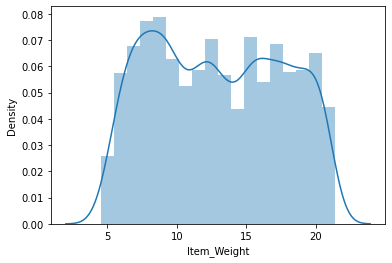

In [24]:
# Inspect the distribution of values in Item_Weight

# Imputation methods to consider: Mean/Median/Mode , Random Sampling

sns.distplot(X_train['Item_Weight'])

### _Mean Imputation_

In [25]:
X_train_copy1 = X_train.copy()
X_test_copy1 = X_test.copy()

# list containing categorical variable
features_num_mean = ['Item_Weight']

# list containing numerical variable
features_cat_missing = ['Outlet_Size']

# instantiating the imputers within a pipeline
pipeline_try1 = Pipeline(steps=[
    ('imp_num_mean', mdi.MeanMedianImputer(imputation_method = 'mean', variables=features_num_mean)),
    ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing'))
])


pipeline_try1.fit(X_train_copy1)


X_train_copy1 = pipeline_try1.transform(X_train_copy1)
X_test_copy1 = pipeline_try1.transform(X_test_copy1)

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


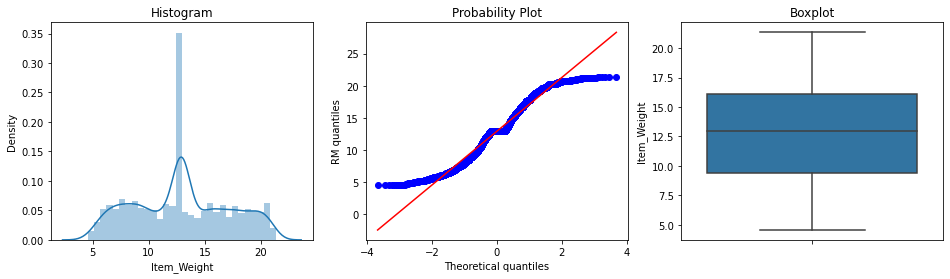

In [26]:
diagnostic_plots(X_train_copy1,'Item_Weight')

### _Random Sampling_

In [27]:
X_train_copy2 = X_train.copy()
X_test_copy2 = X_test.copy()

features_num_mean = ['Item_Weight']

features_cat_missing = ['Outlet_Size']

pipeline_try2 = Pipeline(steps=[
    ('imp_num_mean', mdi.RandomSampleImputer(variables=features_num_mean)),
    ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing'))
])


pipeline_try2.fit(X_train_copy1)


X_train_copy2 = pipeline_try2.transform(X_train_copy2)
X_test_copy2 = pipeline_try2.transform(X_test_copy2)

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


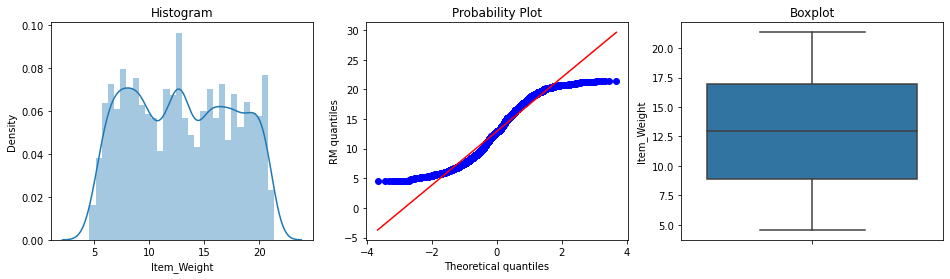

In [28]:
diagnostic_plots(X_train_copy2,'Item_Weight')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

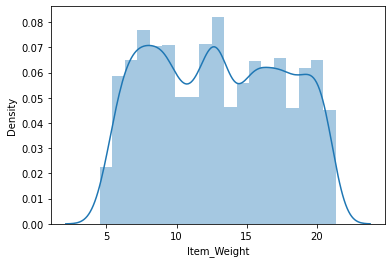

In [29]:
sns.distplot(X_train_copy2['Item_Weight'])

In [30]:
features_num_mean = ['Item_Weight']

# list containing numerical variable
features_cat_missing = ['Outlet_Size']

# instantiating the imputers within a pipeline
pipeline_final = Pipeline(steps=[
    ('imp_num_mean', mdi.RandomSampleImputer(variables=features_num_mean)),
    ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing'))
])

pipeline_final.fit(X_train)

X_train = pipeline_final.transform(X_train)
X_test = pipeline_final.transform(X_test)

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


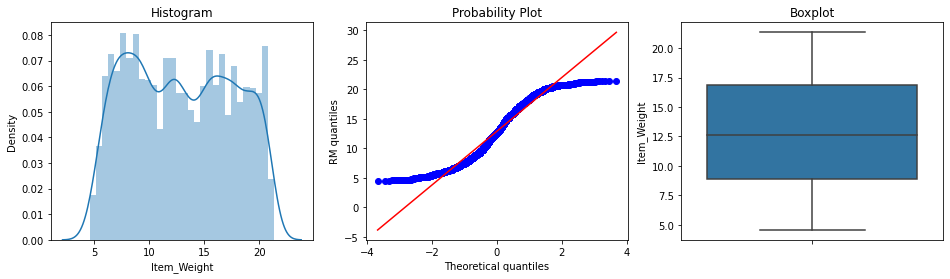

In [31]:
diagnostic_plots(X_train,'Item_Weight')

In [32]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
88,6.305,Regular,0.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,Supermarket Type1
6813,5.980,Low Fat,0.043809,Fruits and Vegetables,146.8418,OUT017,2007,Missing,Tier 2,Supermarket Type1
4046,7.520,Low Fat,0.072317,Household,160.7920,OUT027,1985,Medium,Tier 3,Supermarket Type3
8194,20.700,Regular,0.163780,Dairy,157.8630,OUT019,1985,Small,Tier 1,Grocery Store
8293,9.100,Low Fat,0.080278,Household,47.2718,OUT035,2004,Small,Tier 2,Supermarket Type1


## <u>4. Data Transformation</u> <a id="part4"></a>

### Step 5: Categorical Data Encoding <a id="part4.1"></a>

**<u>Categorical Data</u>**

Out of the different methods for encoding attempted, I have performed one hot encoding (OHE) for all variables, as the Mean Squared Error and R-Square tests, upon using one hot encoder, reflected the best results. While for other methods, it performed poorly, besides one which I will be covering next.

Next, areas of improvement. Understanding the cardinality of my categorical variables, I had better idea of which variables I can use different methods on. Out of the methods tried, OHE reflected the best results, followed by Target Mean Encoding (TME). Hence, upon discovering the high cardinality of Item_Type and Outlet_Identifier, I have decided to use TME for these 2 categorical variables. High cardinality variables put into OHE introduces the addition of many new columns, causing the model to work harder, affecting the model's performance in prediction accuracy.

Therefore, I have decided to use Target Mean Encoding on Item_Type and Outlet_Identifer, while I used One Hot Encoding for the rest of the variables.

In [33]:
cat_cols = [c for c in data.columns if data[c].dtype == 'O']
cat_cols 

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [34]:
# Determine the Best Encoding Method For All Categorical Variables

In [35]:
# One Hot Encoding

X_train_enc1 = X_train.copy()
X_test_enc1 = X_test.copy()
y_train_enc1 = y_train.copy()
y_test_enc1 = y_test.copy()

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)

ohe_enc.fit(X_train_enc1)

X_train_enc1 = ohe_enc.transform(X_train_enc1)
X_test_enc1 = ohe_enc.transform(X_test_enc1)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc1, y_train_enc1)

print('train_mse:', mean_squared_error(y_train_enc1, model_linear_regression.predict(X_train_enc1)), 
      '\n test_mse:', mean_squared_error(y_test_enc1, model_linear_regression.predict(X_test_enc1)))

print('train_r-sq:', r2_score(y_train_enc1, model_linear_regression.predict(X_train_enc1)), 
      '\n test_r-sq:', r2_score(y_test_enc1, model_linear_regression.predict(X_test_enc1)))

train_mse: 963179.4123184172 
 test_mse: 1054387.66813037
train_r-sq: 0.5852701273531574 
 test_r-sq: 0.5754766219665942


In [36]:
# Ordinal Encoding

X_train_enc2 = X_train.copy()
X_test_enc2 = X_test.copy()
y_train_enc2 = y_train.copy()
y_test_enc2 = y_test.copy()

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables= None)

ordinal_enc.fit(X_train_enc2)

X_train_enc2 = ordinal_enc.transform(X_train_enc2)
X_test_enc2 = ordinal_enc.transform(X_test_enc2)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc2, y_train_enc2)

print('train_mse:', mean_squared_error(y_train_enc2, model_linear_regression.predict(X_train_enc2)), 
      '\n test_mse:', mean_squared_error(y_test_enc2, model_linear_regression.predict(X_test_enc2)))

print('train_r-sq:', r2_score(y_train_enc2, model_linear_regression.predict(X_train_enc2)), 
      '\n test_r-sq:', r2_score(y_test_enc2, model_linear_regression.predict(X_test_enc2)))

train_mse: 1262966.7435656881 
 test_mse: 1383212.034329604
train_r-sq: 0.4561864279725325 
 test_r-sq: 0.44308354213655554


In [37]:
# Counts/Frequency Encoding

X_train_enc3 = X_train.copy()
X_test_enc3 = X_test.copy()
y_train_enc3 = y_train.copy()
y_test_enc3 = y_test.copy()

count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables=None)

count_enc.fit(X_train_enc3)

X_train_enc3 = count_enc.transform(X_train_enc3)
X_test_enc3 = count_enc.transform(X_test_enc3)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc3, y_train_enc3)

print('train_mse:', mean_squared_error(y_train_enc3, model_linear_regression.predict(X_train_enc3)), 
      '\n test_mse:', mean_squared_error(y_test_enc3, model_linear_regression.predict(X_test_enc3)))

print('train_r-sq:', r2_score(y_train_enc3, model_linear_regression.predict(X_train_enc3)), 
      '\n test_r-sq:', r2_score(y_test_enc3, model_linear_regression.predict(X_test_enc3)))

train_mse: 995592.6783321501 
 test_mse: 1091502.9600176818
train_r-sq: 0.5713134859278737 
 test_r-sq: 0.5605330584510644


In [38]:
# Target Mean Encoding

X_train_enc4 = X_train.copy()
X_test_enc4 = X_test.copy()
y_train_enc4 = y_train.copy()
y_test_enc4 = y_test.copy()

mean_enc = MeanEncoder(variables=None)

mean_enc.fit(X_train_enc4, y_train_enc4)

X_train_enc4 = mean_enc.transform(X_train_enc4)
X_test_enc4 = mean_enc.transform(X_test_enc4)

# Check For Model Performance
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc4, y_train_enc4)

print('train_mse:', mean_squared_error(y_train_enc4, model_linear_regression.predict(X_train_enc4)), 
      '\n test_mse:', mean_squared_error(y_test_enc4, model_linear_regression.predict(X_test_enc4)))

print('train_r-sq:', r2_score(y_train_enc4, model_linear_regression.predict(X_train_enc4)), 
      '\n test_r-sq:', r2_score(y_test_enc4, model_linear_regression.predict(X_test_enc4)))


train_mse: 965370.9319578937 
 test_mse: 1051711.2007335392
train_r-sq: 0.5843264935406413 
 test_r-sq: 0.5765542360309863


In [39]:
# Out of the 4 Encoding Methods experimented, Target Mean Encoding and One Hot Encoding reflects a better model performance

In [40]:
for each in cat_cols:
    print(each + ":", end = '')
    print(data[each].nunique())

Item_Fat_Content:2
Item_Type:16
Outlet_Identifier:10
Outlet_Size:3
Outlet_Location_Type:3
Outlet_Type:4


In [41]:
# Using Target Mean and One Hot Encoder (Item_Type & Outlet_Identifer)

X_train_enc5 = X_train.copy()
X_test_enc5 = X_test.copy()
y_train_enc5 = y_train.copy()
y_test_enc5 = y_test.copy()

TGRT = ['Item_Type','Outlet_Identifier']
OHE = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Target Mean Encoder
mean_enc5 = MeanEncoder(variables= TGRT)

mean_enc5.fit(X_train_enc5, y_train_enc5)

X_train_enc5 = mean_enc5.transform(X_train_enc5)
X_test_enc5 = mean_enc5.transform(X_test_enc5)


X_train_enc5.head()


# One Hot Encoder
ohe_enc1 = OneHotEncoder(top_categories= None,drop_last=True)

ohe_enc1.fit(X_train_enc5)

X_train_enc5 = ohe_enc.transform(X_train_enc5)
X_test_enc5 = ohe_enc.transform(X_test_enc5)

# Check For Model Performance

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc5, y_train_enc5)

print('train_mse:', mean_squared_error(y_train_enc5, model_linear_regression.predict(X_train_enc5)), 
      '\n test_mse:', mean_squared_error(y_test_enc5, model_linear_regression.predict(X_test_enc5)))

print('train_r-sq:', r2_score(y_train_enc5, model_linear_regression.predict(X_train_enc5)), 
      '\n test_r-sq:', r2_score(y_test_enc5, model_linear_regression.predict(X_test_enc5)))


train_mse: 965439.633063637 
 test_mse: 1051163.9910204955
train_r-sq: 0.5842969119274224 
 test_r-sq: 0.5767745566235876


In [42]:
# Use the Best Encoding Method to encode train and test data

TGRT = ['Item_Type','Outlet_Identifier']
OHE = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Target Mean Encoder
mean_encoder = MeanEncoder(variables= TGRT)

mean_encoder.fit(X_train, y_train)

X_train = mean_encoder.transform(X_train)
X_test = mean_encoder.transform(X_test)


# One Hot Encoder
HotEncode = OneHotEncoder(top_categories= None,drop_last=True)

HotEncode.fit(X_train)

X_train = HotEncode.transform(X_train)
X_test = HotEncode.transform(X_test)

# Check For Model Performance

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

train_mse: 965140.3025607237 
 test_mse: 1051776.5369695304
train_r-sq: 0.5844257989237231 
 test_r-sq: 0.5765279299953133


In [43]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Small,Outlet_Size_Missing,Outlet_Size_Medium,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store
88,6.305,0.123116,2199.986976,95.6436,2233.072759,1997,1,1,0,0,1,0,1,0,0
6813,5.980,0.043809,2146.675125,146.8418,2276.570547,2007,0,0,1,0,0,1,1,0,0
4046,7.520,0.072317,2210.084510,160.7920,3384.052824,1985,0,0,0,1,0,0,0,1,0
8194,20.700,0.163780,2090.238983,157.8630,366.220345,1985,1,1,0,0,1,0,0,0,1
8293,9.100,0.080278,2210.084510,47.2718,2365.186226,2004,0,1,0,0,0,1,1,0,0


### Step 6: Numerical Transformation <a id="part4.2"></a>

**<u>Numerical Data</u>**

I decided to perform transformation after the train-test split to prevent data leakages, preventing any information from the test leaking into the training data, ensuring an unbiased evaluation of the model's performance. 

To achieve an effective linear regression model, it is important to ensure that numerical data follows a Gaussian/Normal distribution as closely as possible, allowing the model to make more accurate predictions based on linearity. More is explained below.

In [44]:
# Showing the numerical data from the original dataset. We will now transform our numerical data, excluding Item_Outlet_Sales

num_var =[c for c in data.columns if data[c].dtype != 'O']
num_var

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

###  _Item_Weight_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


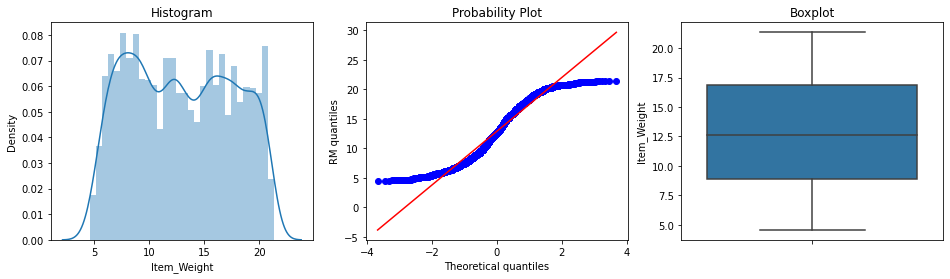

In [45]:
diagnostic_plots(X_train,'Item_Weight')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


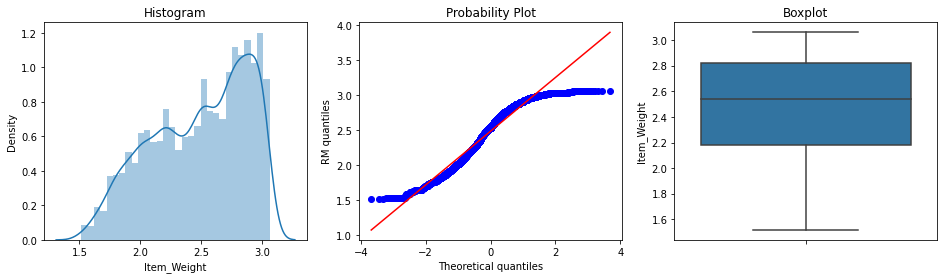

train_mse: 965155.8967165655 
 test_mse: 1051839.9557422544
train_r-sq: 0.5844190843260235 
 test_r-sq: 0.5765023959792761


In [46]:
# Logarithmic Transformation

log_xtrain1 = X_train.copy()
log_xtest1 = X_test.copy()
log_ytrain1 = y_train.copy()
log_ytest1 = y_test.copy()

lt = LogTransformer(variables=['Item_Weight'])

lt.fit(log_xtrain1)

log_xtrain1 = lt.transform(log_xtrain1)

diagnostic_plots(log_xtrain1,'Item_Weight')

model_linear_regression = LinearRegression()
model_linear_regression.fit(log_xtrain1, log_ytrain1)

print('train_mse:', mean_squared_error(log_ytrain1, model_linear_regression.predict(log_xtrain1)), 
      '\n test_mse:', mean_squared_error(log_ytest1, model_linear_regression.predict(log_xtest1)))

print('train_r-sq:', r2_score(log_ytrain1, model_linear_regression.predict(log_xtrain1)), 
      '\n test_r-sq:', r2_score(log_ytest1, model_linear_regression.predict(log_xtest1)))

**Results:** Skews the data to the right, introduces unusual jagged patterns in the Q-Q plot

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


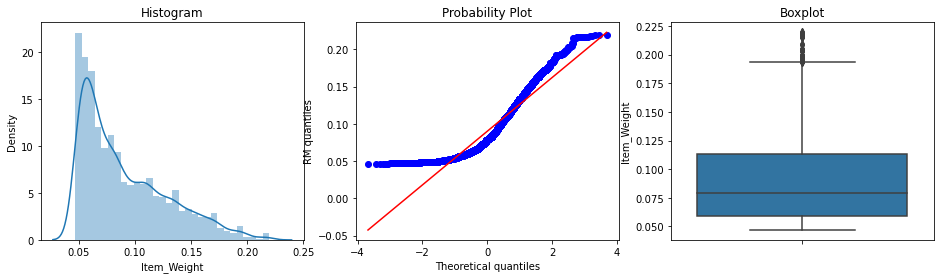

In [47]:
# Reciprocal Transformation

rt_xtrain1 = X_train.copy()
rt_xtest1 = X_test.copy()

lt = ReciprocalTransformer(variables=['Item_Weight'])

lt.fit(rt_xtrain1)

rt_xtrain1 = lt.transform(rt_xtrain1)

diagnostic_plots(rt_xtrain1,'Item_Weight')

**Results:** Skewed the data to the extreme left, data points drifting away from Gaussian distribution, introduced outliers as well

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


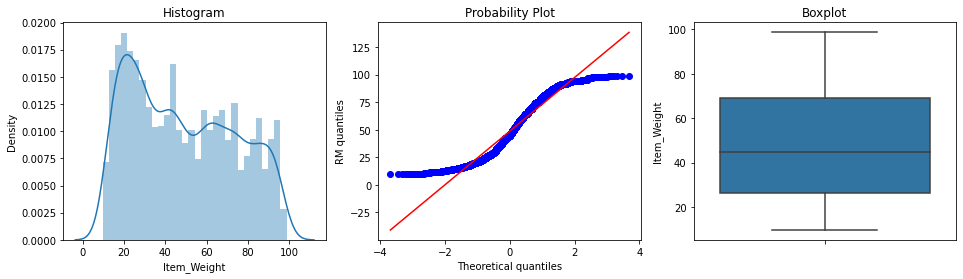

In [48]:
# Power Transformations

pt_xtrain1 = X_train.copy()
pt_xtest1 = X_test.copy()

lt = PowerTransformer(variables=['Item_Weight'], exp = 1.5)

lt.fit(pt_xtrain1)

pt_xtrain1 = lt.transform(pt_xtrain1)

diagnostic_plots(pt_xtrain1,'Item_Weight')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


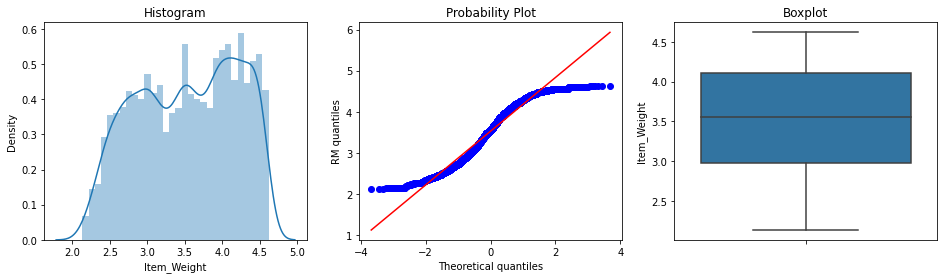

train_mse: 965151.7533360231 
 test_mse: 1053111.25019139
train_r-sq: 0.5844208684003742 
 test_r-sq: 0.575990540396804


In [49]:
# Square-Cube Root Transformation

sq_xtrain1 = X_train.copy()
sq_xtest1 = X_test.copy()
sq_ytrain1 = y_train.copy()
sq_ytest1 = y_test.copy()

lt = PowerTransformer(variables=['Item_Weight'], exp = 1/2)

lt.fit(sq_xtrain1)

sq_xtrain1 = lt.transform(sq_xtrain1)

diagnostic_plots(sq_xtrain1,'Item_Weight')

model_linear_regression = LinearRegression()
model_linear_regression.fit(sq_xtrain1, sq_ytrain1)

print('train_mse:', mean_squared_error(sq_ytrain1, model_linear_regression.predict(sq_xtrain1)), 
      '\n test_mse:', mean_squared_error(sq_ytest1, model_linear_regression.predict(sq_xtest1)))

print('train_r-sq:', r2_score(sq_ytrain1, model_linear_regression.predict(sq_xtrain1)), 
      '\n test_r-sq:', r2_score(sq_ytest1, model_linear_regression.predict(sq_xtest1)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


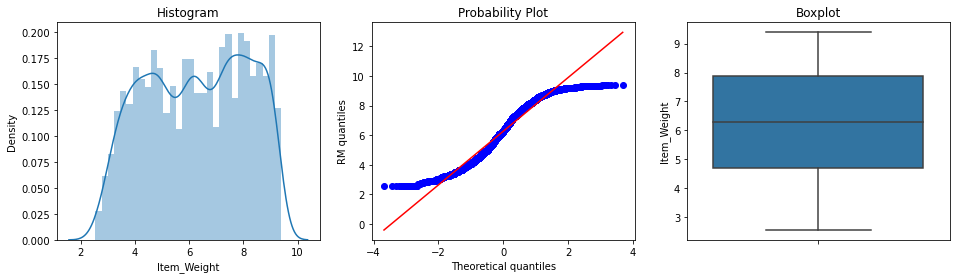

In [50]:
# BoxCox Transformation

bc_xtrain1 = X_train.copy()
bc_xtest1 = X_test.copy()

lt = BoxCoxTransformer(variables=['Item_Weight'])

lt.fit(bc_xtrain1)

bc_xtrain1 = lt.transform(bc_xtrain1)

diagnostic_plots(bc_xtrain1,'Item_Weight')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


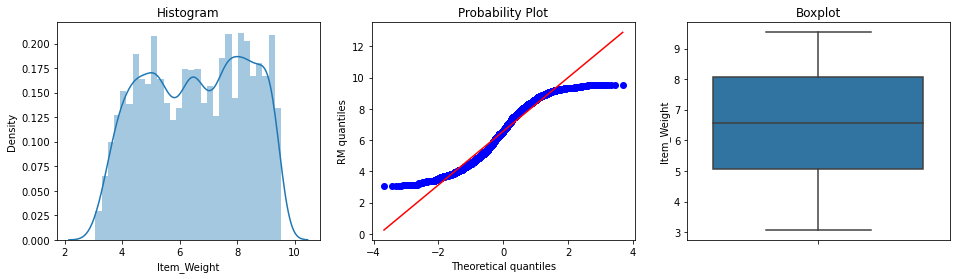

In [51]:
# YeoJohnson Transformation

yj_xtrain1 = X_train.copy()
yj_xtest1 = X_test.copy()

lt = YeoJohnsonTransformer(variables=['Item_Weight'])

lt.fit(yj_xtrain1)

yj_xtrain1 = lt.transform(yj_xtrain1)

diagnostic_plots(yj_xtrain1,'Item_Weight')

**Results:** For Yeo Johnson, BoxCox and Power transformations, skews the data slightly to the right, having very little or no linearity improvements

Therefore, as all the transformation methods above either skews and distorts the distribution of Item_Weight, I decided to not perform any transformation on it, not risking any potential distortions to the distribution.

### _Item_Visibility_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


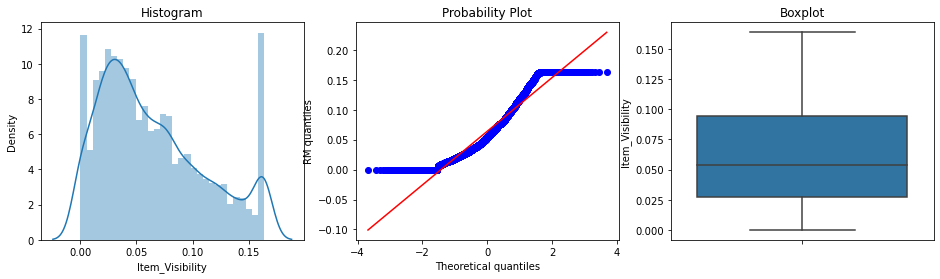

In [52]:
diagnostic_plots(X_train,'Item_Visibility')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


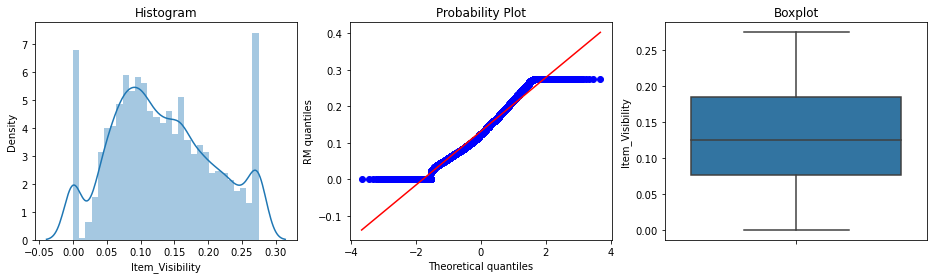

train_mse: 965099.6381649324 
 test_mse: 1051850.5814272626
train_r-sq: 0.5844433083715708 
 test_r-sq: 0.576498117807376


In [53]:
# Power Transformations

pt_xtrain2 = X_train.copy()
pt_xtest2 = X_test.copy()
pt_ytrain2 = y_train.copy()
pt_ytest2 = y_test.copy()

lt = PowerTransformer(variables=['Item_Visibility'], exp = 1/1.4)

lt.fit(pt_xtrain2)

pt_xtrain2 = lt.transform(pt_xtrain2)

diagnostic_plots(pt_xtrain2,'Item_Visibility')

model_linear_regression = LinearRegression()
model_linear_regression.fit(pt_xtrain2, pt_ytrain2)

print('train_mse:', mean_squared_error(pt_ytrain2, model_linear_regression.predict(pt_xtrain2)), 
      '\n test_mse:', mean_squared_error(pt_ytest2, model_linear_regression.predict(pt_xtest2)))

print('train_r-sq:', r2_score(pt_ytrain2, model_linear_regression.predict(pt_xtrain2)), 
      '\n test_r-sq:', r2_score(pt_ytest2, model_linear_regression.predict(pt_xtest2)))

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


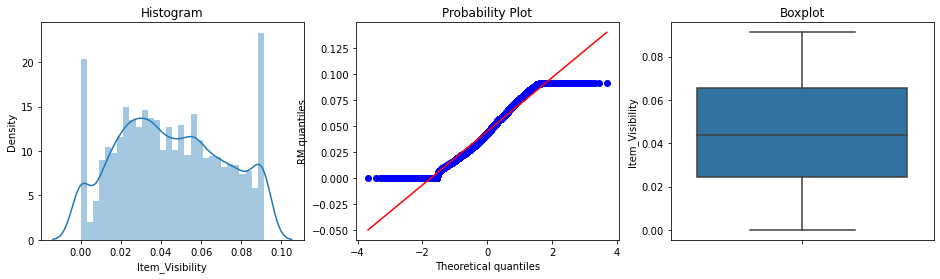

In [54]:
# YeoJohnson Transformation

yj_xtrain2 = X_train.copy()
yj_xtest2 = X_test.copy()

lt = YeoJohnsonTransformer(variables=['Item_Visibility'])

lt.fit(yj_xtrain2)

yj_xtrain2 = lt.transform(yj_xtrain2)

diagnostic_plots(yj_xtrain2,'Item_Visibility')

**Results:** For Item_Visibility, as Power Transformation has caused the distribution to be more Gaussian compared to Yeo Johnson, I have decided to use it, as shown by the Q-Q plot, having more data points following a Gaussian distribution.

### _Item_MRP_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


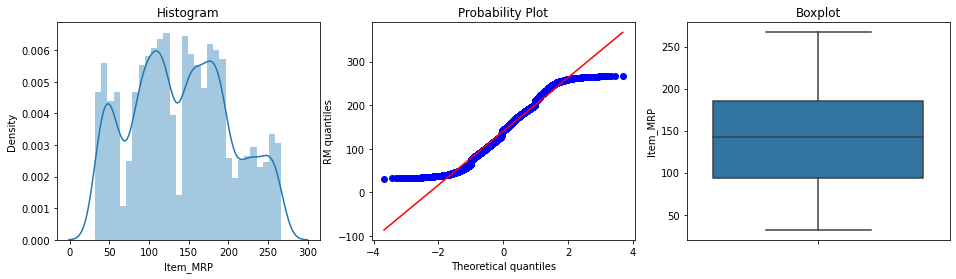

In [55]:
diagnostic_plots(X_train,'Item_MRP')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


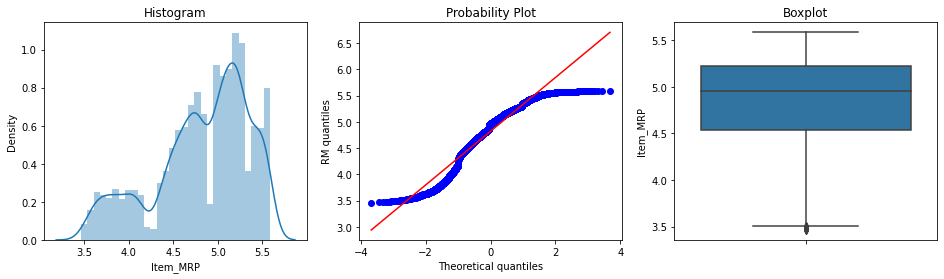

In [56]:
# Logarithmic Transformation

log_xtrain3 = X_train.copy()
log_xtest3 = X_test.copy()
log_ytrain3 = y_train.copy()
log_ytest3 = y_test.copy()

lt = LogTransformer(variables=['Item_MRP'])

lt.fit(log_xtrain3)

log_xtrain3 = lt.transform(log_xtrain3)

diagnostic_plots(log_xtrain3,'Item_MRP')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


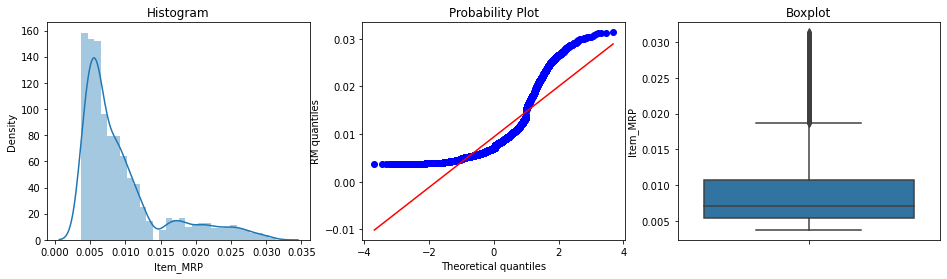

In [57]:
# Reciprocal Transformation

rt_xtrain3 = X_train.copy()
rt_xtest3 = X_test.copy()

lt = ReciprocalTransformer(variables=['Item_MRP'])

lt.fit(rt_xtrain3)

rt_xtrain3 = lt.transform(rt_xtrain3)

diagnostic_plots(rt_xtrain3,'Item_MRP')

**Results:** Logarithmnic and Reciprocal transformation causes extreme data skewing, introduces outliers as well

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


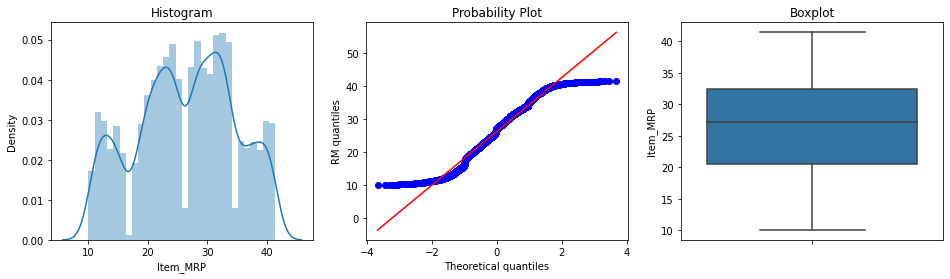

In [58]:
# Power Transformation

pt_xtrain3 = X_train.copy()
pt_xtest3 = X_test.copy()
pt_ytrain3 = y_train.copy()
pt_ytest3 = y_test.copy()

lt = PowerTransformer(variables=['Item_MRP'], exp = 1/1.5)

lt.fit(pt_xtrain3)

pt_xtrain3 = lt.transform(pt_xtrain3)

diagnostic_plots(pt_xtrain3,'Item_MRP')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


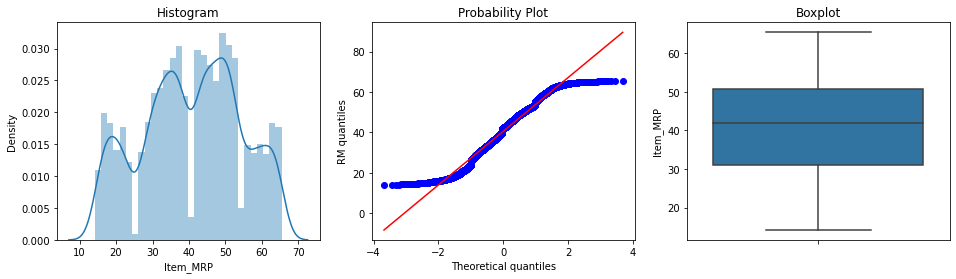

In [59]:
# BoxCox Transformation

bc_xtrain3 = X_train.copy()
bc_xtest3 = X_test.copy()

lt = BoxCoxTransformer(variables=['Item_MRP'])

lt.fit(bc_xtrain3)

bc_xtrain3 = lt.transform(bc_xtrain3)

diagnostic_plots(bc_xtrain3,'Item_MRP')

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


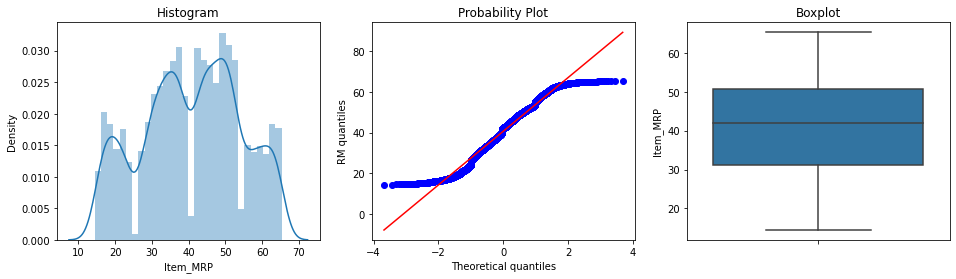

In [60]:
# YeoJohnson Transformation

yj_xtrain3 = X_train.copy()
yj_xtest3 = X_test.copy()

lt = YeoJohnsonTransformer(variables=['Item_MRP'])

lt.fit(yj_xtrain3)

yj_xtrain3 = lt.transform(yj_xtrain3)

diagnostic_plots(yj_xtrain3,'Item_MRP')

**Results:** For YeoJohnson, BoxCox, and Power Transformations, data points of theoretical quantities ranging from -1.5 to -2 seen positioning away from the linear regression line, causing slight deprovements in Gaussian distribution.

Therefore, I will not be using any transformation methods for Item_MRP, as gaussian distribution has been achieved. otherwise, through the transformation, the distribution may end up slightly lmore skewed and distorted.

###  _Final Numerical Transformation_

C:\Users\ryanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


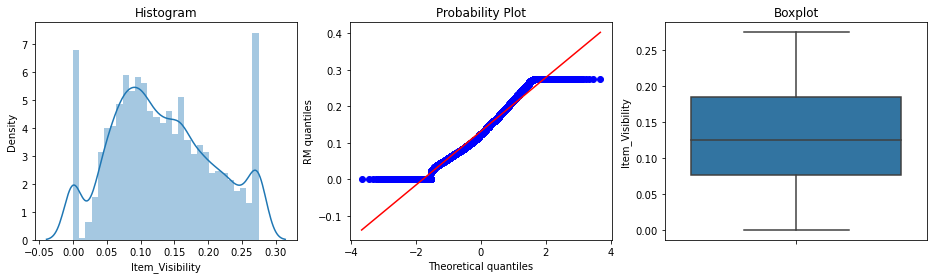

train_mse: 965099.6381649324 
 test_mse: 1051770.1544229854
train_r-sq: 0.5844433083715708 
 test_r-sq: 0.5765304997714038


In [61]:
lt = PowerTransformer(variables=['Item_Visibility'], exp = 1/1.4)

lt.fit(X_train)

X_train = lt.transform(X_train)
X_test = lt.transform(X_test)

diagnostic_plots(X_train,'Item_Visibility')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

In [62]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

train_mse: 965099.6381649324 
 test_mse: 1051770.1544229854
train_r-sq: 0.5844433083715708 
 test_r-sq: 0.5765304997714038


### Step 7: Variable Discretization /Binning <a id="part4.3"></a>

**<u>Discretisation / Binning</u>**

During the discretisation process, across the 3 continuous variables in **con_vars**, after experimenting on 2 different methods, I have decided to choose Equal Width Discretisation as not only does it **lessen the reduction of my model's performance** compared to Equal Frequency Discretisation, but by using it,this will help **preserve the original ordering** of my continuous variables' values, directly **preserving the linear relationships** between variables and the target variable, **preventing distortion of distributions**.

In [63]:
con_vars = ['Item_Weight','Item_Visibility','Item_MRP']

### _Item_Weight_

train_mse: 965101.8979158206 
 test_mse: 1051779.2036734712
train_r-sq: 0.584442335358458 
 test_r-sq: 0.5765268563122654


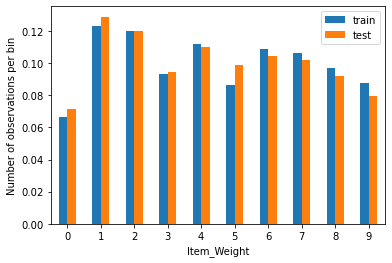

In [64]:
# Equal Width Discretization

X_train1 = X_train.copy()
X_test1 = X_test.copy()
y_train1 = y_train.copy()
y_test1 = y_test.copy()

disc1 = EqualWidthDiscretiser(bins=10, variables = con_vars[0])

disc1.fit(X_train1)

X_train1 = disc1.transform(X_train1)
X_test1 = disc1.transform(X_test1)

t1 = X_train1.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_train1)
t2 = X_test1.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_test1)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train1, y_train1)

print('train_mse:', mean_squared_error(y_train1, model_linear_regression.predict(X_train1)), 
      '\n test_mse:', mean_squared_error(y_test1, model_linear_regression.predict(X_test1)))

print('train_r-sq:', r2_score(y_train1, model_linear_regression.predict(X_train1)), 
      '\n test_r-sq:', r2_score(y_test1, model_linear_regression.predict(X_test1)))

train_mse: 965101.1123695242 
 test_mse: 1051797.4397949765
train_r-sq: 0.584442673602311 
 test_r-sq: 0.5765195139844503


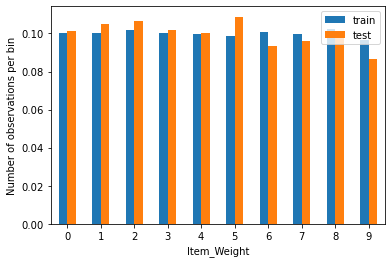

In [65]:
# Equal Frequency Discretization 

X_train2 = X_train.copy()
X_test2 = X_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

disc2 = EqualFrequencyDiscretiser(q=10, variables = con_vars[0])

disc2.fit(X_train2)

X_train2 = disc2.transform(X_train2)
X_test2 = disc2.transform(X_test2)

t1 = X_train2.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_train2)
t2 = X_test2.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_test2)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train2, y_train2)

print('train_mse:', mean_squared_error(y_train2, model_linear_regression.predict(X_train2)), 
      '\n test_mse:', mean_squared_error(y_test2, model_linear_regression.predict(X_test2)))

print('train_r-sq:', r2_score(y_train2, model_linear_regression.predict(X_train2)), 
      '\n test_r-sq:', r2_score(y_test2, model_linear_regression.predict(X_test2)))

### _Item_Visibility_

train_mse: 965117.1530556233 
 test_mse: 1051691.8767453644
train_r-sq: 0.584435766735721 
 test_r-sq: 0.5765620163616796


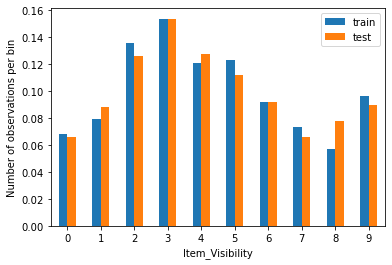

In [66]:
# Equal Width Discretization - selected

X_train3 = X_train.copy()
X_test3 = X_test.copy()
y_train3 = y_train.copy()
y_test3 = y_test.copy()

disc3 = EqualWidthDiscretiser(bins=10, variables = con_vars[1])

disc3.fit(X_train3)

X_train3 = disc3.transform(X_train3)
X_test3 = disc3.transform(X_test3)

t1 = X_train3.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_train3)
t2 = X_test3.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_test3)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train3, y_train3)

print('train_mse:', mean_squared_error(y_train3, model_linear_regression.predict(X_train3)), 
      '\n test_mse:', mean_squared_error(y_test3, model_linear_regression.predict(X_test3)))

print('train_r-sq:', r2_score(y_train3, model_linear_regression.predict(X_train3)), 
      '\n test_r-sq:', r2_score(y_test3, model_linear_regression.predict(X_test3)))

train_mse: 965098.0942682136 
 test_mse: 1051687.671497089
train_r-sq: 0.5844439731491619 
 test_r-sq: 0.5765637095019327


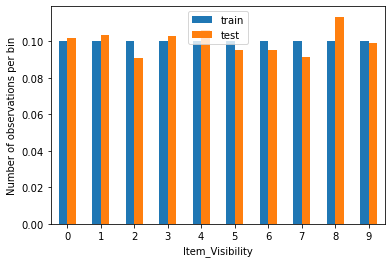

In [67]:
# Equal Frequency Discretization 

X_train4 = X_train.copy()
X_test4 = X_test.copy()
y_train4 = y_train.copy()
y_test4 = y_test.copy()

disc4 = EqualFrequencyDiscretiser(q=10, variables = con_vars[1], return_object = True)

disc4.fit(X_train4)

X_train4 = disc4.transform(X_train4)
X_test4 = disc4.transform(X_test4)

t1 = X_train4.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_train4)
t2 = X_test4.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_test4)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train4, y_train4)

print('train_mse:', mean_squared_error(y_train4, model_linear_regression.predict(X_train4)), 
      '\n test_mse:', mean_squared_error(y_test4, model_linear_regression.predict(X_test4)))

print('train_r-sq:', r2_score(y_train4, model_linear_regression.predict(X_train4)), 
      '\n test_r-sq:', r2_score(y_test4, model_linear_regression.predict(X_test4)))

### _Item_MRP_

train_mse: 978062.550241229 
 test_mse: 1062011.0730487027
train_r-sq: 0.5788616827618682 
 test_r-sq: 0.5724072446342647


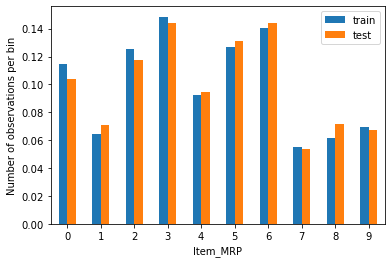

In [68]:
# Equal Width Discretization

X_train5 = X_train.copy()
X_test5 = X_test.copy()
y_train5 = y_train.copy()
y_test5 = y_test.copy()

disc5 = EqualWidthDiscretiser(bins=10, variables = con_vars[2])

disc5.fit(X_train5)

X_train5 = disc5.transform(X_train5)
X_test5 = disc5.transform(X_test5)

t1 = X_train5.groupby(['Item_MRP'])['Item_MRP'].count() / len(X_train5)
t2 = X_test5.groupby(['Item_MRP'])['Item_MRP'].count() / len(X_test5)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train5, y_train5)

print('train_mse:', mean_squared_error(y_train5, model_linear_regression.predict(X_train5)), 
      '\n test_mse:', mean_squared_error(y_test5, model_linear_regression.predict(X_test5)))

print('train_r-sq:', r2_score(y_train5, model_linear_regression.predict(X_train5)), 
      '\n test_r-sq:', r2_score(y_test5, model_linear_regression.predict(X_test5)))

train_mse: 973748.9584681588 
 test_mse: 1053741.626746648
train_r-sq: 0.5807190473855468 
 test_r-sq: 0.5757367347115141


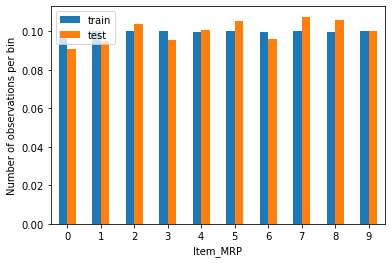

In [69]:
# Equal Frequency Discretization 

X_train6 = X_train.copy()
X_test6 = X_test.copy()
y_train6 = y_train.copy()
y_test6 = y_test.copy()

disc6 = EqualFrequencyDiscretiser(q=10, variables = con_vars[2], return_object = True)

disc6.fit(X_train6)

X_train6 = disc6.transform(X_train6)
X_test6 = disc6.transform(X_test6)

t1 = X_train6.groupby(['Item_MRP'])['Item_MRP'].count() / len(X_train6)
t2 = X_test6.groupby(['Item_MRP'])['Item_MRP'].count() / len(X_test6)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train6, y_train6)

print('train_mse:', mean_squared_error(y_train6, model_linear_regression.predict(X_train6)), 
      '\n test_mse:', mean_squared_error(y_test6, model_linear_regression.predict(X_test6)))

print('train_r-sq:', r2_score(y_train6, model_linear_regression.predict(X_train6)), 
      '\n test_r-sq:', r2_score(y_test6, model_linear_regression.predict(X_test6)))

### _Final Variable Discretisation_

In [70]:
disc = EqualWidthDiscretiser(bins=10, variables = con_vars)

disc.fit(X_train)

X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

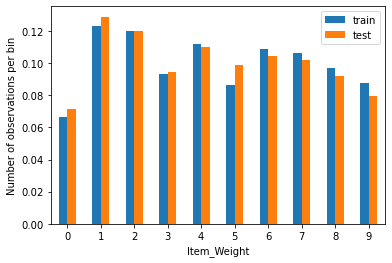

In [71]:
# Item_Weight

t1 = X_train.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_train)
t2 = X_test.groupby(['Item_Weight'])['Item_Weight'].count() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

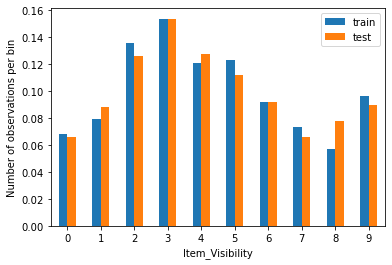

In [72]:
# Item_Visibility

t1 = X_train.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_train)
t2 = X_test.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

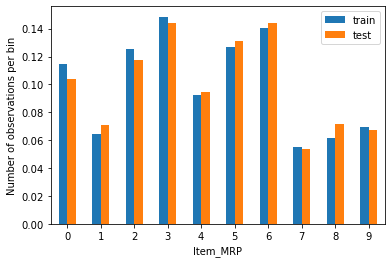

In [73]:
# Item_MRP

t1 = X_train.groupby(['Item_MRP'])['Item_MRP'].count() / len(X_train)
t2 = X_test.groupby(['Item_MRP'])['Item_MRP'].count() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

In [74]:
# Final Tests Scores

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))

train_mse: 978086.2394835822 
 test_mse: 1061952.0902109256
train_r-sq: 0.5788514825475171 
 test_r-sq: 0.5724309926297089


In [75]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Small,Outlet_Size_Missing,Outlet_Size_Medium,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store
88,1,8,2199.986976,2,2233.072759,1997,1,1,0,0,1,0,1,0,0
6813,0,3,2146.675125,4,2276.570547,2007,0,0,1,0,0,1,1,0,0
4046,1,5,2210.084510,5,3384.052824,1985,0,0,0,1,0,0,0,1,0
8194,9,9,2090.238983,5,366.220345,1985,1,1,0,0,1,0,0,0,1
8293,2,6,2210.084510,0,2365.186226,2004,0,1,0,0,0,1,1,0,0


## <u>5. Feature Engineering</u> <a id="part5"></a>

### Step 8: Feature Scaling <a id="part5.1"></a>

**<u>Feature Scaling</u>**

Feature scaling is a crucial step in building the linear regression model, ensuring all variables are on the same scale, helping the model algorithm to perform well. Without scaling, variables will be of different scales, causing the possibility of variables with larger quantity ranges to dominate the model's learning process, leading to biased and unrealiable results.

Out of the different feature scaling methods tried, I ultimately selected **standardisation** as the method for feature scaling. There are several reasons for this:

- The process of feature scaling methods has **very slightly lowered** my model's performance in terms of MSE and R-Square score. After re-running the entire notebook multiple instances to observe the significance of the changes in the scores for different methods I've used, standardisation is selected as it induces the **least impact** on my test scores compared to the other methods. 


- Standardisation is not bounded to a specific range like other methods such as **Mean Normalisation and MinMax Scaling** does. As different variables have different numerical ranges, unlike the 2 methods mentioned, standardisation preserves the original shape of the distributions without compressing the values to a specific range, allowing the linear regression model to identify correlations between variables and the target variable more accurately


- Standardisation is also applicable as it is **not easily affected** by the presence of outliers, ensuring that a good model performance is maintained. Whereas other methods such as MinMax scaling is easily affected by outliers of extreme values, making such methods unreliable.

#### Standardisation

In [76]:
X_train_feat1 = X_train.copy()
X_test_feat1 = X_test.copy()
y_train_feat1 = y_train.copy()
y_test_feat1 = y_test.copy()

scaler = StandardScaler()

scaler.fit(X_train_feat1)

X_train_feat1 = scaler.transform(X_train_feat1)
X_test_feat1 = scaler.transform(X_test_feat1)

In [77]:
scaler.mean_

array([4.48189742e+00, 4.30422394e+00, 2.11359717e+03, 4.11615823e+00,
       2.11359717e+03, 1.99786423e+03, 3.52497486e-01, 2.82601408e-01,
       2.81763326e-01, 3.28863560e-01, 2.86791820e-01, 3.22326517e-01,
       6.53369092e-01, 1.08615488e-01, 1.27388535e-01])

In [78]:
X_train_feat1 = pd.DataFrame(X_train_feat1, columns=X_train.columns)
X_test_feat1 = pd.DataFrame(X_test_feat1, columns=X_test.columns)

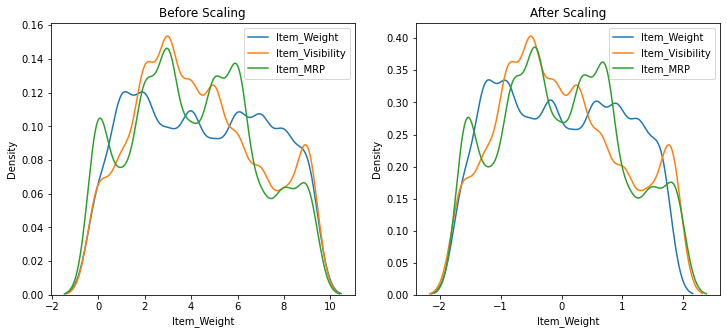

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat1['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_feat1['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_feat1['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

In [80]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat1, y_train_feat1)

print('train_mse:', mean_squared_error(y_train_feat1, model_linear_regression.predict(X_train_feat1)), 
      '\n test_mse:', mean_squared_error(y_test_feat1, model_linear_regression.predict(X_test_feat1)))

print('train_r-sq:', r2_score(y_train_feat1, model_linear_regression.predict(X_train_feat1)), 
      '\n test_r-sq:', r2_score(y_test_feat1, model_linear_regression.predict(X_test_feat1)))

train_mse: 978086.2394835823 
 test_mse: 1061952.0902109253
train_r-sq: 0.5788514825475171 
 test_r-sq: 0.5724309926297091


#### Mean Normalisation

In [81]:
means = X_train.mean(axis=0)

In [82]:
ranges = X_train.max(axis=0)-X_train.min(axis=0)

In [83]:
X_train_feat2 = (X_train - means) / ranges

# Calculate mean normalization for X_test
X_test_feat2 = (X_test - means) / ranges

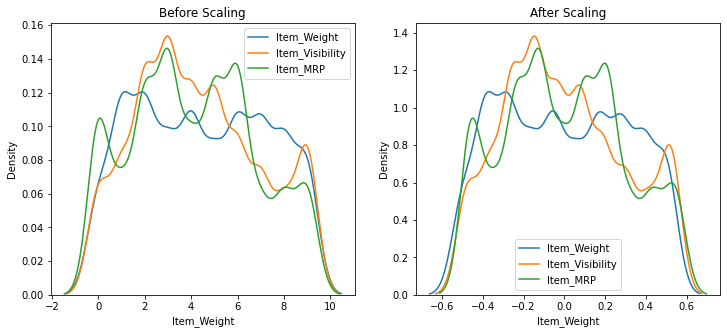

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat2['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_feat2['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_feat2['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

#### MinMaxScaling

In [85]:
X_train_feat3 = X_train.copy()
X_test_feat3 = X_test.copy()
y_train_feat3 = y_train.copy()
y_test_feat3 = y_test.copy()

scaler3 = MinMaxScaler()

scaler3.fit(X_train_feat3)

X_train_feat3 = scaler3.transform(X_train_feat3)
X_test_feat3 = scaler3.transform(X_test_feat3)

In [86]:
X_train_feat3 = pd.DataFrame(X_train_feat3, columns=X_train.columns)
X_test_feat3 = pd.DataFrame(X_test_feat3, columns=X_test.columns)

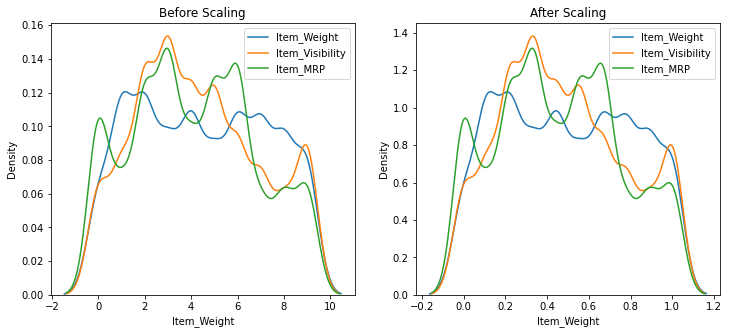

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat3['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_feat3['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_feat3['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

In [88]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat3, y_train_feat3)

print('train_mse:', mean_squared_error(y_train_feat3, model_linear_regression.predict(X_train_feat3)), 
      '\n test_mse:', mean_squared_error(y_test_feat3, model_linear_regression.predict(X_test_feat3)))

print('train_r-sq:', r2_score(y_train_feat3, model_linear_regression.predict(X_train_feat3)), 
      '\n test_r-sq:', r2_score(y_test_feat3, model_linear_regression.predict(X_test_feat3)))

train_mse: 978086.2394835823 
 test_mse: 1061952.0902109256
train_r-sq: 0.5788514825475171 
 test_r-sq: 0.5724309926297089


#### Maximum Absolute Scaling

In [89]:
X_train_feat4 = X_train.copy()
X_test_feat4 = X_test.copy()
y_train_feat4 = y_train.copy()
y_test_feat4 = y_test.copy()

In [90]:
scaler4 = MaxAbsScaler()

scaler4.fit(X_train_feat4)

X_train_feat4 = scaler4.transform(X_train_feat4)
X_test_feat4 = scaler4.transform(X_test_feat4)

In [91]:
X_train_feat4 = pd.DataFrame(X_train_feat4, columns=X_train.columns)
X_test_feat4 = pd.DataFrame(X_test_feat4, columns=X_test.columns)

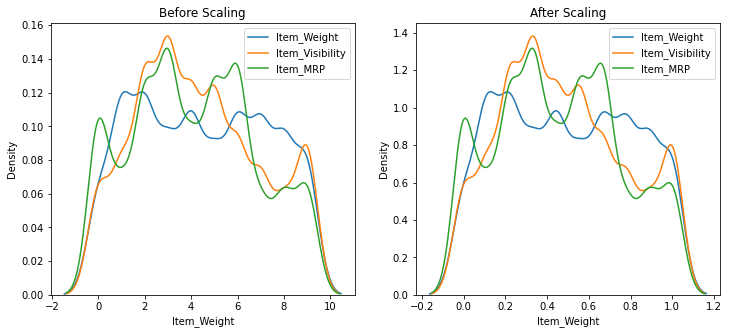

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat4['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_feat4['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_feat4['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

In [93]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat3, y_train_feat3)

print('train_mse:', mean_squared_error(y_train_feat3, model_linear_regression.predict(X_train_feat3)), 
      '\n test_mse:', mean_squared_error(y_test_feat3, model_linear_regression.predict(X_test_feat3)))

print('train_r-sq:', r2_score(y_train_feat3, model_linear_regression.predict(X_train_feat3)), 
      '\n test_r-sq:', r2_score(y_test_feat3, model_linear_regression.predict(X_test_feat3)))

train_mse: 978086.2394835823 
 test_mse: 1061952.0902109256
train_r-sq: 0.5788514825475171 
 test_r-sq: 0.5724309926297089


#### Robust Scaling

In [94]:
X_train_feat5 = X_train.copy()
X_test_feat5 = X_test.copy()
y_train_feat5 = y_train.copy()
y_test_feat5 = y_test.copy()

In [95]:
scaler5 = RobustScaler()

scaler5.fit(X_train_feat5)

X_train_feat5 = scaler5.transform(X_train_feat5)
X_test_feat5 = scaler5.transform(X_test_feat5)

In [96]:
X_train_feat5 = pd.DataFrame(X_train_feat5, columns=X_train.columns)
X_test_feat5 = pd.DataFrame(X_test_feat5, columns=X_test.columns)

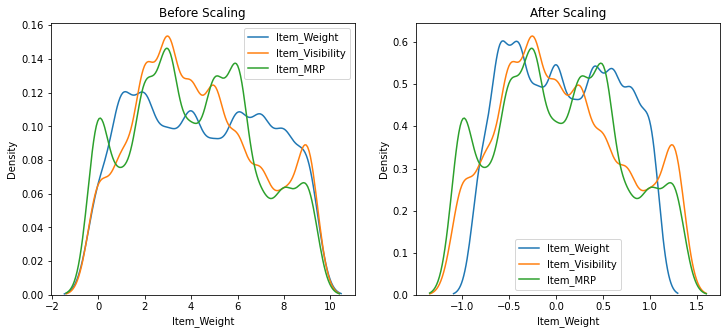

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_feat5['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_feat5['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_feat5['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

In [98]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_feat5, y_train_feat5)

print('train_mse:', mean_squared_error(y_train_feat5, model_linear_regression.predict(X_train_feat5)), 
      '\n test_mse:', mean_squared_error(y_test_feat5, model_linear_regression.predict(X_test_feat5)))

print('train_r-sq:', r2_score(y_train_feat5, model_linear_regression.predict(X_train_feat5)), 
      '\n test_r-sq:', r2_score(y_test_feat5, model_linear_regression.predict(X_test_feat5)))

train_mse: 978086.2394835823 
 test_mse: 1061952.0902109253
train_r-sq: 0.5788514825475171 
 test_r-sq: 0.572430992629709


#### Final Feature Scaling Method

In [99]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

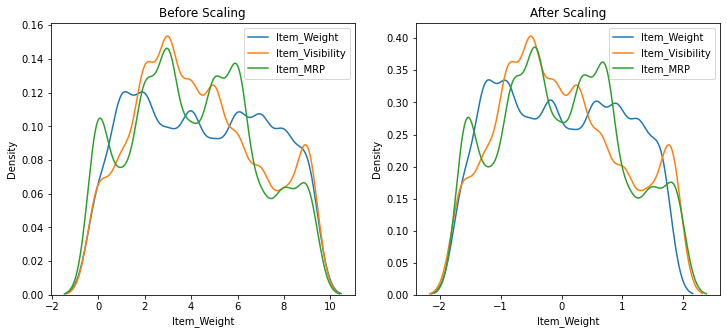

In [101]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
ax1.legend()

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_scaled['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_scaled['Item_MRP'], ax=ax2, label ='Item_MRP')
ax2.legend()
plt.show()

In [102]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_scaled, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train_scaled)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test_scaled)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train_scaled)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test_scaled)))

train_mse: 978086.2394835823 
 test_mse: 1061952.0902109253
train_r-sq: 0.5788514825475171 
 test_r-sq: 0.5724309926297091


### Step 9: Adding/Removing Features <a id="part5.2"></a>

**<u>Addition of Features / Dropping Features</u>**

The creation of new features **capture complex nonlinear relationships** between variables, enhancing the model's predictive performance. Furthermore, the addition and dropping of features such as PCA can help **reduce the dimensionality** of the data, only keeping the important ones, allowing the model to consume less processing power, producing more accurate predictions based on the only-important variables.

For my linear regression model, I have decided to only conduct polynomial expansion and did not attempt to try out other methods such as PCA. There are several reasons for this:

- PCA - To **prevent any form of data loss**, PCA is normally used for dimensionality reduction by extracting only important features according to % of variance explained. Believing that **all data is important** in Item_Outlet_Sales prediction, preventing the loss of potentially important data, I decided not to use it.


- Addition-Multiply, Subtraction-Quotient - **Without sufficient domain knowledge**, and the different possibilities and **combinations** of conducting such mathematical computations, it is **difficult to determine the best combination** to compute.

Hence, using Polynomial Expansion is more viable option, not only due to the **high simplicity** of it just by **identifying variables with higher correlation**, but by the introduction of higher-order polynomials, the linear regression model can **model curved or nonlinear patterns**, improving the models's capability to **fit complex data patterns**, improving the model's predictive power.

Hence, after conducting polynomial expansion, my MSE and R-Square test scores has **relatively improved**, from around **0.57 to 0.628**. Ths evidently shows that polynomial expansion in my linear regression model has improved my model's performance greatly.

#### Polynomial Expansion

In [103]:
tmp = X_train_scaled.copy()
try_poly = X_train_scaled.copy()
try_poly_test = X_test_scaled.copy()

tmp['Target'] = y_train.tolist()
tmp.head(20)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Small,Outlet_Size_Missing,Outlet_Size_Medium,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3,Outlet_Type_Grocery Store,Target
0,-1.252537,1.407139,0.846397,-0.801885,0.156067,-0.103393,1.355323,1.593284,-0.626338,-0.700007,1.576975,-0.689664,0.728374,-0.349071,-0.38208,661.8052
1,-1.612265,-0.496573,0.324078,-0.044016,0.212886,1.092965,-0.737832,-0.627635,1.596583,-0.700007,-0.634126,1.449981,0.728374,-0.349071,-0.38208,1765.7016
2,-1.252537,0.264911,0.945326,0.334918,1.659550,-1.539022,-0.737832,-0.627635,-0.626338,1.428557,-0.634126,-0.689664,-1.372921,2.864750,-0.38208,3675.2160
3,1.625289,1.787881,-0.228850,0.334918,-2.282534,-1.539022,1.355323,1.593284,-0.626338,-0.700007,1.576975,-0.689664,-1.372921,-0.349071,2.61725,469.3890
4,-0.892808,0.645654,0.945326,-1.559754,0.328642,0.734058,-0.737832,1.593284,-0.626338,-0.700007,-0.634126,1.449981,0.728374,-0.349071,-0.38208,850.8924
5,-0.892808,-0.496573,0.094664,1.471721,0.212886,1.092965,-0.737832,-0.627635,1.596583,-0.700007,-0.634126,1.449981,0.728374,-0.349071,-0.38208,4697.8848
6,0.905832,-0.877316,0.945326,-0.801885,-2.289392,0.016243,-0.737832,-0.627635,1.596583,-0.700007,-0.634126,-0.689664,-1.372921,-0.349071,2.61725,386.1640
7,1.265561,0.645654,0.915947,0.713852,0.164973,-1.299751,-0.737832,-0.627635,-0.626338,-0.700007,-0.634126,-0.689664,0.728374,-0.349071,-0.38208,2865.6032
8,1.625289,1.787881,1.824599,-0.801885,-0.202623,1.332236,-0.737832,-0.627635,-0.626338,1.428557,-0.634126,-0.689664,-1.372921,-0.349071,-0.38208,1427.4752
9,0.186376,-0.496573,0.324078,-0.422951,0.164973,-1.299751,1.355323,-0.627635,-0.626338,-0.700007,-0.634126,-0.689664,0.728374,-0.349071,-0.38208,1627.8810


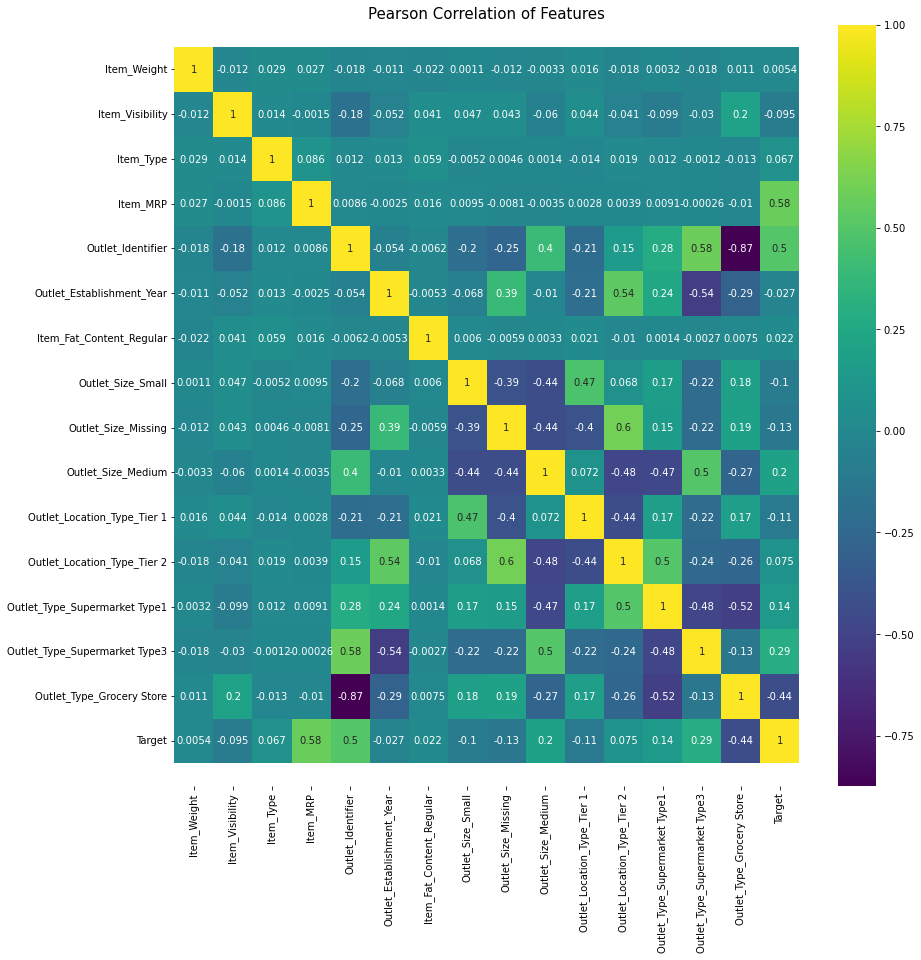

In [104]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(tmp.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [105]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [106]:
poly.fit(try_poly[['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store']])

PolynomialFeatures(degree=3, include_bias=False)

In [107]:
try_poly= poly.transform(try_poly[['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store']])
try_poly_test= poly.transform(try_poly_test[['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store']])

In [108]:
poly.get_feature_names(['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store'])

C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Item_MRP',
 'Outlet_Identifier',
 'Outlet_Type_Grocery Store',
 'Item_MRP^2',
 'Item_MRP Outlet_Identifier',
 'Item_MRP Outlet_Type_Grocery Store',
 'Outlet_Identifier^2',
 'Outlet_Identifier Outlet_Type_Grocery Store',
 'Outlet_Type_Grocery Store^2',
 'Item_MRP^3',
 'Item_MRP^2 Outlet_Identifier',
 'Item_MRP^2 Outlet_Type_Grocery Store',
 'Item_MRP Outlet_Identifier^2',
 'Item_MRP Outlet_Identifier Outlet_Type_Grocery Store',
 'Item_MRP Outlet_Type_Grocery Store^2',
 'Outlet_Identifier^3',
 'Outlet_Identifier^2 Outlet_Type_Grocery Store',
 'Outlet_Identifier Outlet_Type_Grocery Store^2',
 'Outlet_Type_Grocery Store^3']

In [109]:
try_poly_test = pd.DataFrame(try_poly_test)

# Add column names of created features
try_poly_test.columns = poly.get_feature_names(['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store'])

try_poly_test.head()

,Item_MRP,Outlet_Identifier,Outlet_Type_Grocery Store,Item_MRP^2,Item_MRP Outlet_Identifier,Item_MRP Outlet_Type_Grocery Store,Outlet_Identifier^2,Outlet_Identifier Outlet_Type_Grocery Store,Outlet_Type_Grocery Store^2,Item_MRP^3,Item_MRP^2 Outlet_Identifier,Item_MRP^2 Outlet_Type_Grocery Store,Item_MRP Outlet_Identifier^2,Item_MRP Outlet_Identifier Outlet_Type_Grocery Store,Item_MRP Outlet_Type_Grocery Store^2,Outlet_Identifier^3,Outlet_Identifier^2 Outlet_Type_Grocery Store,Outlet_Identifier Outlet_Type_Grocery Store^2,Outlet_Type_Grocery Store^3
0,0.334918,0.107980,-0.38208,0.112170,0.036165,-0.127966,0.011660,-0.041257,0.145985,0.037568,0.012112,-0.042858,0.003905,-0.013818,0.048893,0.001259,-0.004455,0.015764,-0.055778
1,-1.180819,1.659550,-0.38208,1.394334,-1.959628,0.451168,2.754105,-0.634081,0.145985,-1.646457,2.313967,-0.532748,-3.252100,0.748735,-0.172382,4.570573,-1.052289,0.242270,-0.055778
2,-0.044016,0.212886,-0.38208,0.001937,-0.009370,0.016818,0.045321,-0.081340,0.145985,-0.000085,0.000412,-0.000740,-0.001995,0.003580,-0.006426,0.009648,-0.017316,0.031078,-0.055778
3,-0.044016,0.212886,-0.38208,0.001937,-0.009370,0.016818,0.045321,-0.081340,0.145985,-0.000085,0.000412,-0.000740,-0.001995,0.003580,-0.006426,0.009648,-0.017316,0.031078,-0.055778
4,0.713852,0.164973,-0.38208,0.509585,0.117767,-0.272749,0.027216,-0.063033,0.145985,0.363768,0.084068,-0.194702,0.019428,-0.044996,0.104212,0.004490,-0.010399,0.024084,-0.055778


In [110]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(try_poly, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(try_poly)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(try_poly_test)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(try_poly)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(try_poly_test)))

train_mse: 884706.5492429417 
 test_mse: 959455.6461806955
train_r-sq: 0.6190593052501265 
 test_r-sq: 0.6136986762069272


C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Final Computation

In [111]:
X_train_poly = X_train_scaled
X_test_poly = X_test_scaled

In [112]:
finalpoly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [113]:
finalpoly.fit(X_train_poly[['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store']])

PolynomialFeatures(degree=3, include_bias=False)

In [114]:
X_train_poly = finalpoly.transform(X_train_poly[['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store']])
X_test_poly = finalpoly.transform(X_test_poly[['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store']])

In [115]:
X_test_poly = pd.DataFrame(X_test_poly)

# add column names of created features
X_test_poly.columns = finalpoly.get_feature_names(['Item_MRP','Outlet_Identifier','Outlet_Type_Grocery Store'])

X_test_poly.head()

C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Item_MRP,Outlet_Identifier,Outlet_Type_Grocery Store,Item_MRP^2,Item_MRP Outlet_Identifier,Item_MRP Outlet_Type_Grocery Store,Outlet_Identifier^2,Outlet_Identifier Outlet_Type_Grocery Store,Outlet_Type_Grocery Store^2,Item_MRP^3,Item_MRP^2 Outlet_Identifier,Item_MRP^2 Outlet_Type_Grocery Store,Item_MRP Outlet_Identifier^2,Item_MRP Outlet_Identifier Outlet_Type_Grocery Store,Item_MRP Outlet_Type_Grocery Store^2,Outlet_Identifier^3,Outlet_Identifier^2 Outlet_Type_Grocery Store,Outlet_Identifier Outlet_Type_Grocery Store^2,Outlet_Type_Grocery Store^3
0,0.334918,0.107980,-0.38208,0.112170,0.036165,-0.127966,0.011660,-0.041257,0.145985,0.037568,0.012112,-0.042858,0.003905,-0.013818,0.048893,0.001259,-0.004455,0.015764,-0.055778
1,-1.180819,1.659550,-0.38208,1.394334,-1.959628,0.451168,2.754105,-0.634081,0.145985,-1.646457,2.313967,-0.532748,-3.252100,0.748735,-0.172382,4.570573,-1.052289,0.242270,-0.055778
2,-0.044016,0.212886,-0.38208,0.001937,-0.009370,0.016818,0.045321,-0.081340,0.145985,-0.000085,0.000412,-0.000740,-0.001995,0.003580,-0.006426,0.009648,-0.017316,0.031078,-0.055778
3,-0.044016,0.212886,-0.38208,0.001937,-0.009370,0.016818,0.045321,-0.081340,0.145985,-0.000085,0.000412,-0.000740,-0.001995,0.003580,-0.006426,0.009648,-0.017316,0.031078,-0.055778
4,0.713852,0.164973,-0.38208,0.509585,0.117767,-0.272749,0.027216,-0.063033,0.145985,0.363768,0.084068,-0.194702,0.019428,-0.044996,0.104212,0.004490,-0.010399,0.024084,-0.055778


In [116]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_poly, y_train)

print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train_poly)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test_poly)))

print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train_poly)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test_poly)))

train_mse: 884706.5492429417 
 test_mse: 959455.6461806955
train_r-sq: 0.6190593052501265 
 test_r-sq: 0.6136986762069272


C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [117]:
X_train_student_final_premodel_version = X_train_poly
X_test_student_final_premodel_version = X_test_poly

y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

## <u>6. Linear Regression Model</u> <a id="part6"></a>

### Step 10: Linear Regression Modelling <a id="part6.1"></a>

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [118]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [119]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 884706.5492429417 
 test_mse: 959455.6461806955
train_r-sq: 0.6190593052501265 
 test_r-sq: 0.6136986762069272


C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\ryanm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**<u>Evaluation of Model</u>**

In my final linear regression model, to encapsulate the model process, these are the following steps I have taken to construct my model:

- Outlier Handling
- Missing Value Imputation
- Encoding
- Numerical Transformation
- Discretisation/Binning
- Feature Engineering

After the following steps, the final MSE and R-Square results are estimated to be around this range:

- **train_mse**: 884706.5492429417 
- **test_mse**: 959455.6461806955
- **train_r-sq**: 0.6190593052501265 
- **test_r-sq**: 0.6136986762069272

As stated above, MSE represents the squared differences between predicted the value and the actual value of Item_Outlet Sales. A lower MSE indicates that our predictions are closer to the actual values, manifesting better model performance.

R-Square represents the proportion of the variables we intend to predict (Item_Outlet_Sales) that can be explaine by the linear regression model. The closer R-Square is to 1, the better our model is at explaining the variation in the data.

From our test results, basic inferences can be made, in which our training data's MSE and R-Square values are 884706.55 and 61.9% respectively. This suggests that our model performance in the training data has a moderate level of accuracy in predicting the Item_Outlet_Sales accurately, as shown that 61.9% of the varience in Item_Outlet Sales can be explained with the linear regression model, and the average squared difference between the predicted Item_Outlet Sales and Actual Item_Outlet Sales value is 884,706.55.

Whereas for the test data's MSE and R-Square values, they are at 959455.65 and 61.4% respectively. Notably, the test data's performed slightly more poorly compared to the train data, as the MSE is slightly higher than that of the train data, while the R-Square value has a lower %. This still suggests that the model performance in the test data has a moderate level of accuracy in predicting the Item_Outlet_Sales accurately, as shown that 61.4% of the varience in Item_Outlet Sales can be explained with the linear regression model, and the average squared difference between the predicted Item_Outlet Sales and Actual Item_Outlet Sales value is 959455.65. However, the test data's poorer results may be an indicator that the model might be slightly overfitting the training data.

Overall, from the linear regression model performance results, it has indicated to us that the model built has a moderate level of accuracy in predicting the Item_Outlet_Sales based on the predictor variables.

Nonetheless, after receiving the test results, I am slightly unsatisfied with my model performance, as for linear regression model to present highly accurate predictions, I would have desired for a lower MSE, indicating to me that the difference between the model's predicted values and the actual value for Item_Outlet Sales lower, showing its accuracy in prediction, indicating to me that the model has higher levels of accuracy, showing me that the model has a better fit to predict Item_Outlet Sales based on the predictor variables. Same applies for having higher R-Square score, whereby higher scores are indicative of higher % of variance in Item_Outlet_Sales explained by the model, indicating the high accuracy power of the model.

## <u>7. Summary & Further Improvements</u> <a id="part7"></a>

**<u>Summary of Findings</u>**

In conclusion, there are various insights that can be drawn out from the linear regression model I have created, in which there are some correlations between Item_Outlet_Sales and predictor variables that contribute to the prediction of Item_Outlet_Sales. Variables such as Item's Maximum Retail Price (MRP), Outlet Identifier, and Outlet Type, has shown to be important variables in predicting the value of the Item_Outlet Sales. 

After building and evaluating the model, with the result of the linear regression model's moderate accurate prediction power of Item_Outlet Sales, the supermarket will have greater awareness of features that potentially has correlations with the Item_Outlet_Sales. With the regression model's aid, the model is able to conduct predictions on the Item_Outlet sales, showing the predicted sale for a particular item, at a particular outlet. With the supermarket business taking note of this, this will allow them to order items of the specific outlet and item based on higher Item_Outlet Sales prediction performed by the regression model, allowing the supermarket to reap greater sales, increasing the general profitiability of the supermarket operations. 

Hence, the linear regression model can assist the supermarket greatly in terms of prediction of sales, giving the business indications of what items to get to reap greater sales based on item features, at the same time, where to deploy the items based on outlet features.

**<u>Further Improvements</u>**

There are many aspect that can be highly improved throughout the modelling process. Mainly focusing on attempting to improve the MSE and R-Square scores, in order to do so, I may have wanted to spend more time on the pre-stage of the modelling, exploring the data further and find more correlations, allowing me to take note of how different variables relate to each other. This would give me a better idea of the various methods that I should use for particular variables. 

After completing the model, more steps can be taken such as conducting an effective measurement of the model's predictive accuracy, Residual Analysis, apart from using the MAE and R-Square. Residual Analysis examines the in-depth differences between the model's predicted values and the actual values, identifying any patterns or deviations when a modelling method is applied. This will allow us to have a better illustration of the best method for each modelling process besides using MSE and R-Square, giving us guidelines to find the best method to improve the model.

Another last improvement I would have considered is attempting to try out different combinations of methods, instead of finding the best method for each modelling step based on the MSE and R-Square. Howeverm, this process may consume large amounts of time, but if methods are applied correctly, the model manifest better model performance.

With these possible improvements, the model performance would exhibit better results and improvements.